## **Tanzanian Water Wells Prediction**


![Alt text](happy.jpg)

## Business Understanding 

### Business Overview

Tanzania is an East African country situated south of the Equator . Tanzania National Bureau of Statistics estimates a population of 61.8 million people. A publication done by World Bank approximates that only  61% of the population has acces to basic water supply , this has been made possible through programs such as the Water Sector Development Program. Since the commencement of the project, Tanzania has made significant progress towards access to water, sanitation and hygiene services, half the population now has access to clean water in the rainy season and two-thirds of the population during the dry season.

Despite the significant progress made, a considerable amount of the population still suffers from adverse effects of inadequate water supply and sanitation. Tanzania has had to contend  with death and disease as an immediate consequence of this with the burden falling heaviest on women, children, the poor and the vulnerable. 

### Problem Statement 

The UN-Habitat wants to form a partnership with top funders in Tanzania who look to address sustainable development through ensuring clean water supply to communities in Tanzania. The UN-Habitat has taken keen notice on Tanzania’s commitment to expanding access to clean water over the past 7 years , however there is still an estimate of 31,000 deaths each year due to inadequate water and sanitation services. Over 10% of these deaths are preventable.

An initiative is to be  set up to curb lack of acces to clean water supply  by looking into the distribution of wells in Tanzania and the functionality of water pumps in the existing water wells. Its’s worth noting that some water pumps are functional but in need of maintenance while others are simply non-functional. 

My task as a data scientist is to locate patterns that will enable me predict water pump functionality with the aim of providing insights on the core features that affect water pump functionality. These patterns will enable our stakeholders to accurately predict water pumps that need maintenance and water points that stakeholders should chanel their resources to due to them being non-functional.



### Objectives

1. To identify the patterns in functional and non-functional wells.

2. To predict the functionality of water pumps based on the features provided.

3. To ascertain features that greatly affect water pump functionality


### Evaluation Metrics for Successive Model

1. Generate a model with a Recall of 70%+ 

2. Root Mean Squared Error of close to 0 to evaluate model efficiency.


## Data Understanding

Load Libraries 

In [219]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_squared_error
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier



Load Data

In [4]:
# loading training set values and training set labels data

def read_data(path):

    data = pd.read_csv(path)

    return data

df_1 = read_data(r'C:\Users\user\Documents\Tanzania Water Wells\training set values.csv')
df_2 = read_data(r'C:\Users\user\Documents\Tanzania Water Wells\training set labels.csv')

In [5]:
# combining the two datasets together 

def combined_dataframe(data_0, data_1):

    """ A simple function to combine the two datasets using the id column present in both datasets """

    new_df = data_0.set_index('id').join(data_1.set_index('id'))

    return new_df

df = combined_dataframe(df_1, df_2)
df.head() 

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [6]:
# checking the columns of our dataset

def read_columns(data):

    columns = data.columns

    return columns
    

read_columns(df)

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [7]:
# previewing the shape and information of our dataframe 

def get_info_shape(data):

    print(f'The shape of our dataset is: {data.shape}')
    print(f'with {data.shape[0]} number of rows')
    print(f'and {data.shape[1]} columns')
    print('********************************************************')
    print('********************************************************')
    print(data.info())

    
get_info_shape(df)   

The shape of our dataset is: (59400, 40)
with 59400 number of rows
and 40 columns
********************************************************
********************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region    

In [8]:
# statistical analysis of our dataset 

def statistical_analysis(data):
    
    return data.describe()

statistical_analysis(df)

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [9]:
# checking to see the data types in our dataset  

def data_types(data):

    print("Our dataset has", len( data.select_dtypes(include='number').columns),
                "numeric columns")
    
    print("and", len(data.select_dtypes(include='object').columns),
          "categorical columns")

    print('*****************************************************')
    print('*****************************************************')

    print('Numerical Columns:', data.select_dtypes(include='number').columns)
    print('Categorical Coulumns:', data.select_dtypes(include='object').columns)

data_types(df) 

Our dataset has 9 numeric columns
and 31 categorical columns
*****************************************************
*****************************************************
Numerical Columns: Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'region_code', 'district_code', 'population', 'construction_year'],
      dtype='object')
Categorical Coulumns: Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')


From the analysis above, the number of rows we have favors our modelling. The longer your data the better. We have a total of 40 columns, 9 of which have numerical data while 31 columns have categorical data.

## Data Cleaning

### Duplicates 

In [10]:
# function to check for duplicates

duplicates = []

def check_duplicates(data):

    """Function that iterates through the rows of our dataset to check whether they are duplicated or not"""
    
    for i in data.duplicated():
        duplicates.append(i)
    duplicates_set = set(duplicates)
    if(len(duplicates_set) == 1):
        print('Our Dataset has no Duplicates')

    else:
        duplicates_percentage = np.round(((sum(duplicates)/len(data)) * 100 ), 2)
        print(f'Duplicated rows constitute of {duplicates_percentage} % of our dataset')
        

check_duplicates(df)

Duplicated rows constitute of 0.06 % of our dataset


In [11]:
# dropping duplicated values 

def drop_duplicates(data):

    data = data.drop_duplicates(inplace = True)
    
    return data

drop_duplicates(df)

In [12]:
# previewing shape of our Dataframe after dropping some values 

def shape(data):

    data_shape = data.shape

    return data_shape

shape(df)

(59364, 40)

### Outliers 

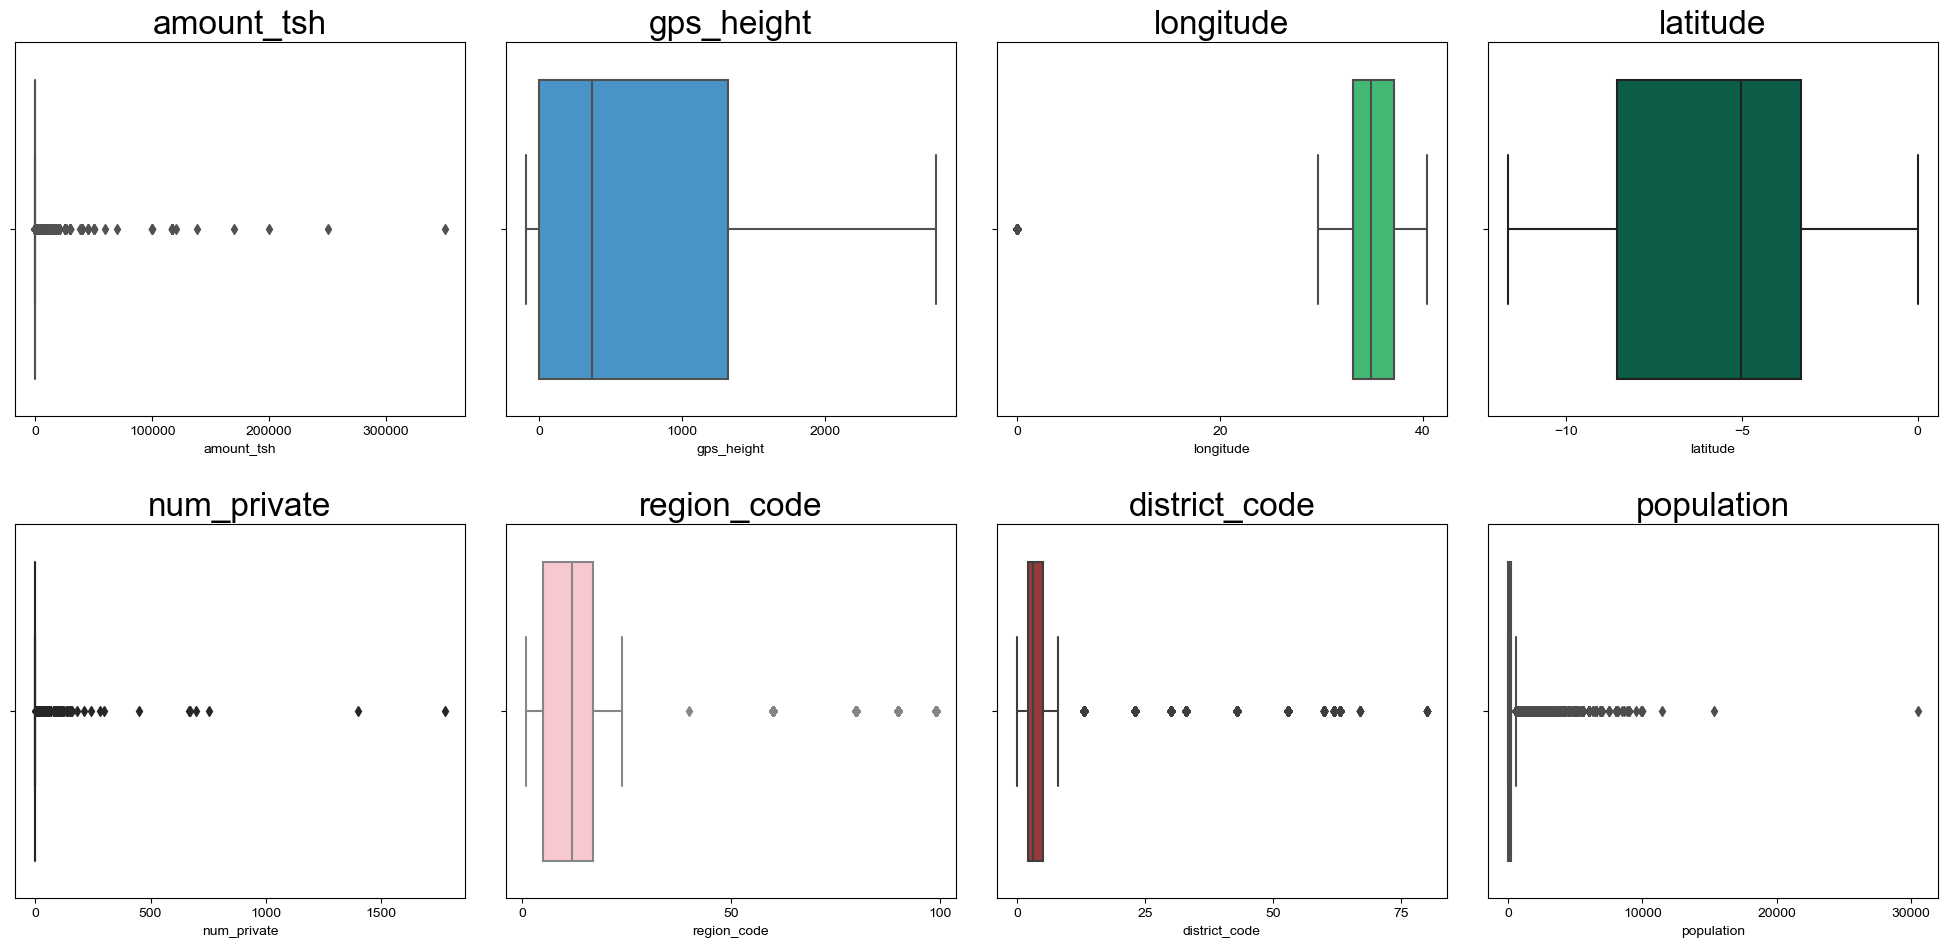

In [13]:
# visualizing outliers in our numerical data
 
def plot_boxplots(data, cols):
    fig, axes = plt.subplots(2, 4, figsize=(20,10))
    axes = axes.ravel()
    sns.set(font_scale=2.0)

    colors = ["#9b59b6", "#3498db", "#2ecc71", "#006a4e", 'purple', 'pink', 'brown', 'gray']

    for i, col in enumerate(cols[:8]):

        # convert the x-axis variable to a numeric data type
        
        data[col] = data[col].astype(float)
        sns.boxplot(x=data[col], ax=axes[i], color=colors[i])
        
        axes[i].set_title(col)
    plt.tight_layout()

# specify the columns to plot

cols = df.select_dtypes(include='number').columns


plot_boxplots(df, cols)

As per our visualization we see that we have outliers present in the amount_tsh column, num_private column, region and district code column and the population. We will not delve much into the region code and the division code, these are international standard denomination for country subdivisions that have already been established.For the num_private column we will further explore our data to determine whether the outliers are valid when we will be performing explatory data analysis.Amount Total Static Head (amount_tsh), measures the total vertical distance that a pump raises water. In simpler terms we can also say its the pressure at a specific point in the system. The oultiers on the amount_tsh might be valid . There are a true reflection of the pressure a water pump can generate. It is possibe to even have a Total Static Head of 350000.0 which is the maximum value on the column. We will also explore this further by plotting a histogram to check the distribution. Its possible to have a population of even 30,000 people so we will not explore this. Therefore we will not be doing any outlier treatments


## Missing Values 

In [14]:
def missing_values(data):

    missing_values = data.isnull().sum().sort_values(ascending=False)

    missing_val_percent = ((data.isnull().sum()/len(data)).sort_values(ascending=False))

    """ creating a dataframe containing missing values and their percentages """
    
    missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage %': missing_val_percent})
    
    return missing_df[missing_df['Percentage %'] > 0]

missing_values(df)


,Missing Values,Percentage %
scheme_name,28139,0.474008
scheme_management,3877,0.065309
installer,3655,0.061569
funder,3635,0.061232
public_meeting,3314,0.055825
permit,3056,0.051479
subvillage,371,0.006250


We will only be focusing on the missing values in columns scheme_name, scheme_management, installer, funder and public meeting. Lets' start 

### Scheme Name and Scheme Management 

The main objective of our project is to be able to indetify patterns in our datasets that will enable us predict faulty water pumps. These two features do not contribute towards that . The only information they give us is what to call the scheme and who manages it, this is not enugh to identify whether we have faulty water pumps. For this reason, we will go ahead and drop this columns. In addition to that scheme name contains about 47 percentage of missing values , which is almost half our dataset. Its only correct we drop the column

In [15]:
# dropping the columns 

def dropping_columns(columns):

    drop_column = df.drop(columns=columns, inplace = True)
    
    return drop_column

columns_to_drop = df[['scheme_name', 'scheme_management']]

dropping_columns(columns_to_drop)

In [16]:
# preview shape 

shape(df)

(59364, 38)

### Installer

The percentage of missing data in this column is quite low. After analysing and successfully creating predictions from our dataset. we are to generate reccomendations to our stakeholders. Such a reccomendation may be advising our stakeholders on the best contractor to do installations. Choice of installers can greatly contribute to the durability of water pumps. Factors such as seating, damaged seal, or misaligned gasket can mean the water pump is not operating efficienty. Therefore reccomending a list of installers is commendable here. In this case we will only drop the rows with the missing values

### Funder 

This refers to the organisation that donated the pumps. We want to advise our stakeholder on who it should collaborate with to raise maximum funds towards the initiative therfore we will just drop the rows with the missing values

### Public Meeting

Public meetings are a way of the community to come together and raise issues of concern. We will also just missing values of the columns


In [17]:
# removing rows with missing values from columns installer, funder and public_meeting

def drop_rows(data, columns):

    new_data = data.dropna(subset=columns, inplace=True)

    return new_data

col = ['installer', 'funder', 'public_meeting']

drop_rows(df, col)

In [18]:
# previewing new shape 

shape(df)

(52560, 38)

### Irrelevant Columns

The following columns do not seem relevant to our business problem and therefore we will go ahead and drop them
1. Permit
2. Subvillage
3. wpt_name
4. region_code
5. district_code
6. lga
7. ward
8. recorded_by
9. date_recorded 

Note : we will be using latitudes and longitudes to map our regions therefore we do not need additional columns with geographical location information


Some columns are good for exploratory data analysis just to get a feel of our data , we will not be dropping those however we will not use some of them during modelling 

In [19]:
irrelevant_columns = df[['permit', 'subvillage', 'wpt_name', 'region_code', 'district_code', 'lga', 'ward', 'recorded_by', 'date_recorded']]

dropping_columns(irrelevant_columns)

Now that we have cleaned our dataset, Lets take a look at our columns to see if we have columns with the similar information, check for misspellings on our dataset, check for whitespaces and check to rename. Let's start with columns that appear to have the same information

### Payment and Payment Type

In [20]:
# tallying up unique responses in our dataset 

def tally(column):

    groupings = column.value_counts()

    return groupings

print(tally(df.payment))
print('**************************************')
print('**************************************')
print(tally(df.payment_type))

never pay                22712
pay per bucket            8311
pay monthly               8009
unknown                   5205
pay when scheme fails     3850
pay annually              3513
other                      960
Name: payment, dtype: int64
**************************************
**************************************
never pay     22712
per bucket     8311
monthly        8009
unknown        5205
on failure     3850
annually       3513
other           960
Name: payment_type, dtype: int64


The totals for payment and payment type are the same, to mean these two columns represent the same information. Therefore we shall drop one column

In [21]:
# dropping payment column

payment_col = df[['payment']]

dropping_columns(payment_col)


### Water Quality and Quality Group


In [22]:
print(tally(df.water_quality))
print('**************************************')
print('**************************************')
print(tally(df.quality_group))

soft                  45598
salty                  4429
unknown                1009
milky                   717
coloured                379
salty abandoned         239
fluoride                173
fluoride abandoned       16
Name: water_quality, dtype: int64
**************************************
**************************************
good        45598
salty        4668
unknown      1009
milky         717
colored       379
fluoride      189
Name: quality_group, dtype: int64


Both these columns contain information about water quality.Notice that quality group combined both flouride and flouride abandoned to form just flouride, it did the same to salty and salty abandoned to form just salty. Water quality gives us a good subdivision of the water quality as opposed to quality group,therefore its only wise to keep the column and drop quality group 


In [23]:
# dropping quality_group

quality_grp = df[['quality_group']]

dropping_columns(quality_grp)

### Quantity and Quantity Group

In [24]:
print(tally(df.quantity))
print('**************************************')
print('**************************************')
print(tally(df.quantity_group))

enough          30156
insufficient    13413
dry              5367
seasonal         3235
unknown           389
Name: quantity, dtype: int64
**************************************
**************************************
enough          30156
insufficient    13413
dry              5367
seasonal         3235
unknown           389
Name: quantity_group, dtype: int64


Both the columns have the same information with the same totals.We then choose one

In [25]:
quantity_grp = df[['quantity_group']]

dropping_columns(quantity_grp)

### Source and Source Type Source class

In [26]:
print(tally(df.source))
print('**************************************')
print('**************************************')
print(tally(df.source_type))
print('**************************************')
print('**************************************')
print(tally(df.source_class))


spring                  15236
shallow well            15037
machine dbh              9506
river                    8646
rainwater harvesting     1894
hand dtw                  784
lake                      624
dam                       603
other                     195
unknown                    35
Name: source, dtype: int64
**************************************
**************************************
spring                  15236
shallow well            15037
borehole                10290
river/lake               9270
rainwater harvesting     1894
dam                       603
other                     230
Name: source_type, dtype: int64
**************************************
**************************************
groundwater    40563
surface        11767
unknown          230
Name: source_class, dtype: int64


The three columns all have information about water sources. The column source however has one entry called machine dbh that is quite hard to decipher, the column source_type gives us an indepth breakdown of the water source and its quite easy to understand each source.The column source class just gives us as general overview of water source. We will go ahead and make use of the column source_type since its more clear than the other two 


In [27]:
# dropping columns source and source class

water_source_col = df[['source', 'source_class']]

dropping_columns(water_source_col)

### Water point and Water point type group 

In [28]:
print(tally(df.waterpoint_type))
print('**************************************')
print('**************************************')
print(tally(df.waterpoint_type_group))


communal standpipe             24544
hand pump                      15777
communal standpipe multiple     5778
other                           5617
improved spring                  730
cattle trough                    107
dam                                7
Name: waterpoint_type, dtype: int64
**************************************
**************************************
communal standpipe    30322
hand pump             15777
other                  5617
improved spring         730
cattle trough           107
dam                       7
Name: waterpoint_type_group, dtype: int64


There is no much difference between the two columns only that column waterpoint_type has split the type of communal standpipe while water_point_type_group has combined them both .
We will go ahead and pick waterpoint_type_group

In [29]:
# dropping waterpoint type 

waterpoint_type_col = df[['waterpoint_type']]

dropping_columns(waterpoint_type_col)

### Management and Management Type

In [30]:
print(tally(df.management))
print('**************************************')
print('**************************************')
print(tally(df.management_group))


vwc                 36424
wug                  5516
water board          2674
wua                  2295
private operator     1655
parastatal           1371
water authority       810
other                 682
company               662
unknown               295
other - school         99
trust                  77
Name: management, dtype: int64
**************************************
**************************************
user-group    46909
commercial     3204
parastatal     1371
other           781
unknown         295
Name: management_group, dtype: int64


We will go ahead and choose management column

In [31]:
# dropping management_group
management_group_col = df[['management_group']]

dropping_columns(management_group_col)

### Extraction Type , Extraction Type Group and Extraction Type Class

In [32]:
print(tally(df.extraction_type))
print('**************************************')
print('**************************************')
print(tally(df.extraction_type_class))
print('**************************************')
print('**************************************')
print(tally(df.extraction_type_group))



gravity                      23759
nira/tanira                   7231
other                         5597
submersible                   3913
swn 80                        3431
mono                          2514
india mark ii                 2257
afridev                       1522
ksb                           1334
other - rope pump              344
other - swn 81                 206
windmill                       111
cemo                            90
india mark iii                  88
other - play pump               84
walimi                          46
climax                          32
other - mkulima/shinyanga        1
Name: extraction_type, dtype: int64
**************************************
**************************************
gravity         23759
handpump        14866
other            5597
submersible      5247
motorpump        2636
rope pump         344
wind-powered      111
Name: extraction_type_class, dtype: int64
**************************************
*********************

We will go ahead and remain with extraction type group column

In [33]:
# dropping extraction type and extraction type column

extraction_col = df[['extraction_type', 'extraction_type_class']]

dropping_columns(extraction_col)

Now that we have sorted our columns that seem to have similar information lets explore other columns of our remaining dataset

Num Private

In [34]:
print(tally(df.num_private))

0.0       51836
6.0          73
1.0          68
8.0          46
5.0          44
32.0         40
45.0         36
15.0         35
39.0         30
93.0         28
3.0          26
7.0          24
65.0         22
47.0         21
102.0        20
4.0          19
2.0          18
17.0         17
80.0         15
20.0         14
25.0         12
41.0         10
34.0         10
11.0         10
16.0          8
120.0         7
22.0          6
150.0         6
24.0          5
50.0          5
12.0          5
58.0          4
38.0          4
9.0           4
14.0          3
10.0          3
26.0          2
27.0          2
240.0         1
1776.0        1
55.0          1
94.0          1
755.0         1
450.0         1
300.0         1
60.0          1
87.0          1
280.0         1
672.0         1
668.0         1
42.0          1
23.0          1
62.0          1
180.0         1
131.0         1
35.0          1
141.0         1
213.0         1
698.0         1
1402.0        1
Name: num_private, dtype: int64


There is no clear information about the column num_private entails and almost all of the observations are zero , therefore we will go ahead and drop the column

In [35]:
# dropping num private 

num_private_col = df[['num_private']]

dropping_columns(num_private_col)


Funder

In [36]:
""" funder seems to have strings of 0 as its obseravtion """

# replacing 0 with unknown

df['funder'].fillna(value='Unknown',inplace=True)
df['funder'].replace(to_replace = '0', value ='Unknown' , inplace=True)

Installer 

In [37]:
""" the installer column seems to have some spelling mistakes or different syntax between same categories
    replacing the spelling mistakes and having same categories in same name"""

df['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

df['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
df['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

df['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                  'District Council','Council','Counc','District  Council','Distri'),
                                 value ='District council' , inplace=True)

df['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                   'RC CATHORIC',) , value ='RC Church' , inplace=True)

df['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                    'central government','Cental Government', 'Cebtral Government', 
                                  'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                    'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                    'Centra govt') , value ='Central government' , inplace=True)

df['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                      value ='world vision' , inplace=True)

df['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
df['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

df['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                    'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                    'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                    'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                    'Village Office','Village community members'),
                                     value ='villagers' , inplace=True)

df['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                      value ='Community' , inplace=True)
df['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

df['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

df['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)

df['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)

df['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)

df['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)

df['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)

df['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)

df['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)

df['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)

df['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)

df['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

In [38]:
# preview shape of our dataframe

shape(df)

(52560, 19)

We are done with cleaning our dataset now let's move to Explatory Data Analysis

## Explatory Data Analysis 

We will perform the following analysis

>> * Univariate Analysis : Explores each variable in a dataset separately looking at the range of values.
>> * Bivariate Analysis : Explores the analysis of two variables to be able to determine the relationship between them 

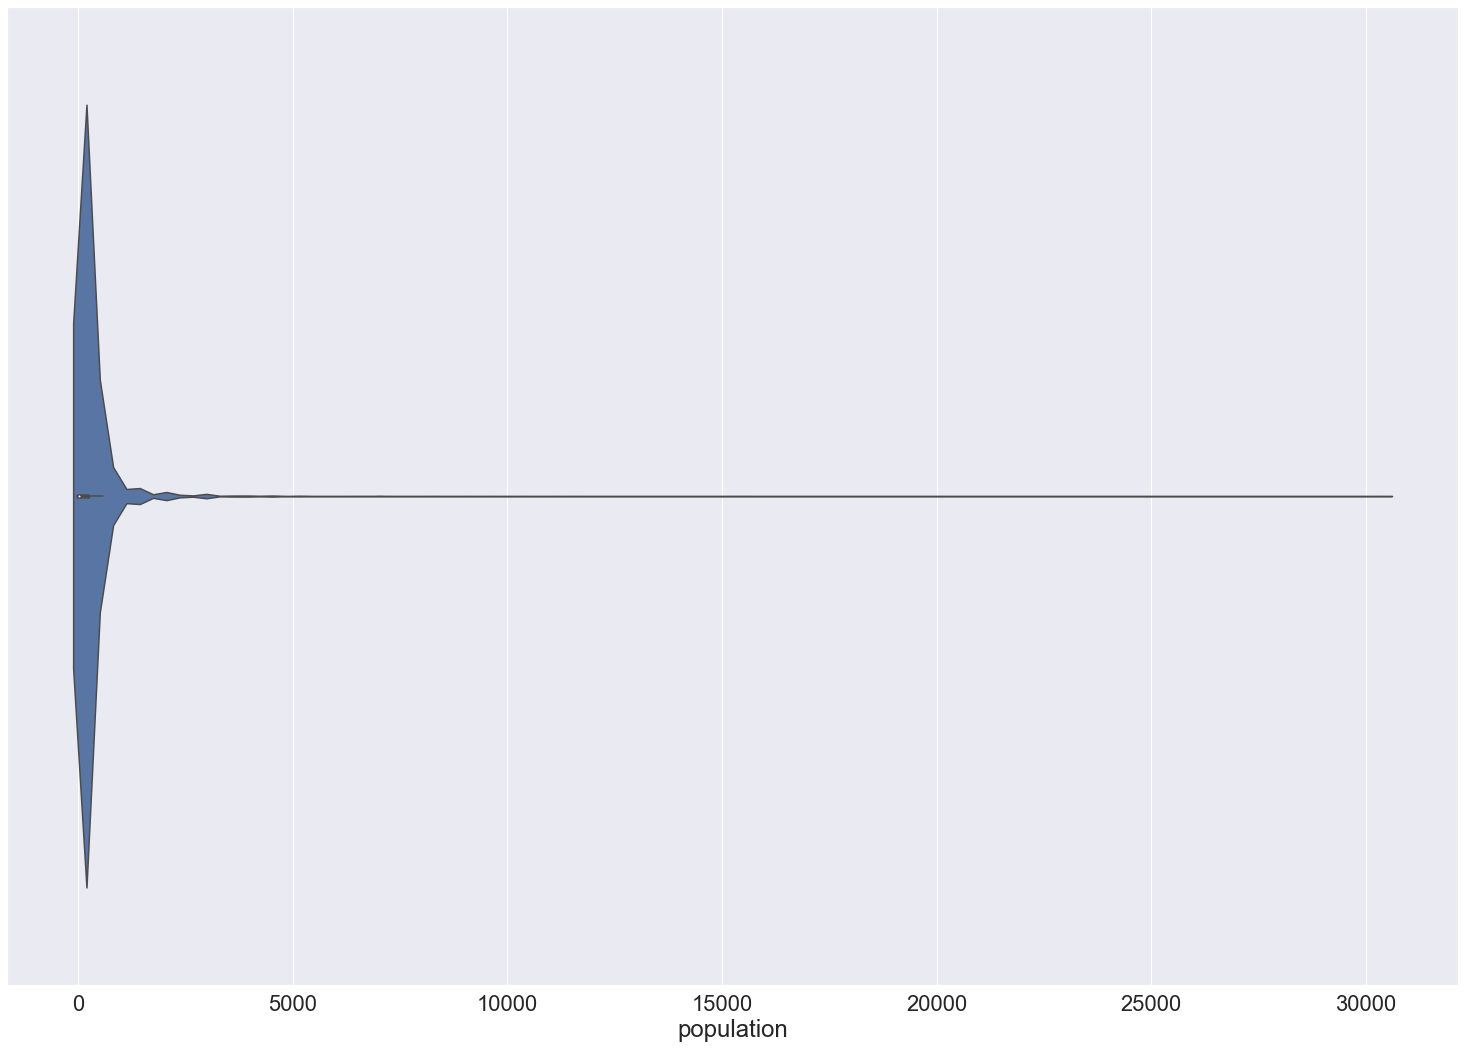

In [174]:
plt.figure(figsize=(26,18))
ax = sns.violinplot(x=df['population'])
plt.show()

### Funder Distribution

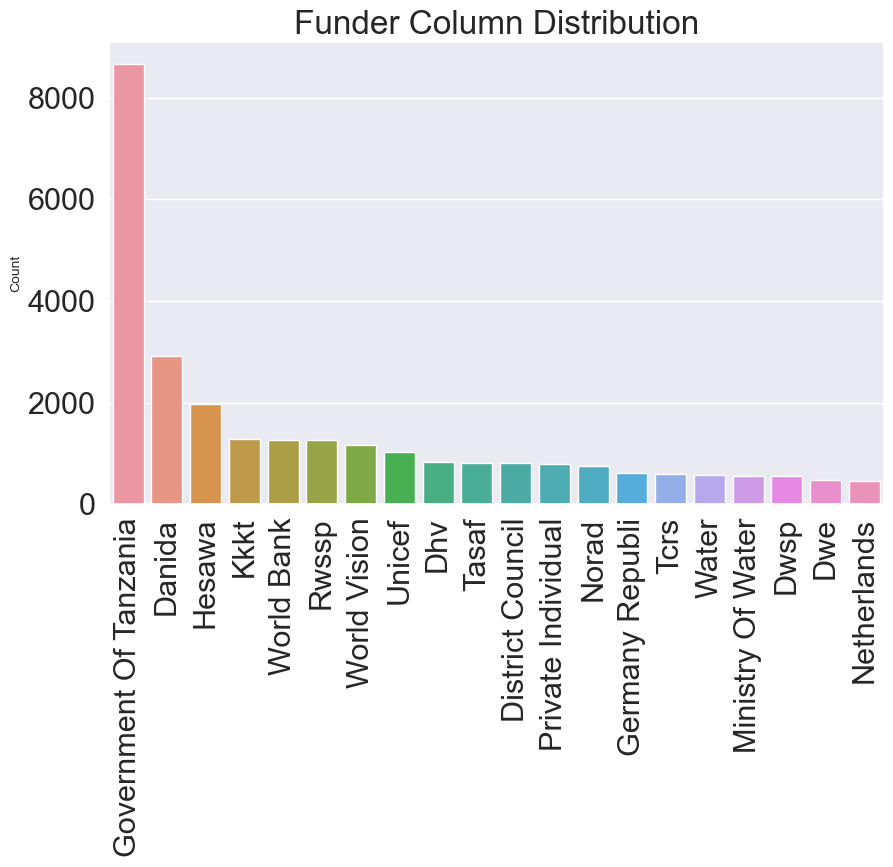

In [39]:
# function to plot distribution

def plot_data(data, col, title):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    column_groupings = tally(data[col])
    sns.barplot(x=column_groupings.head(20).index, y=column_groupings.head(20))
    plt.title(title)
    plt.xticks(rotation=90)
    plt.ylabel('Count', fontsize=10)

    
plot_data(df, 'funder', 'Funder Column Distribution')

Most wells in Tanzania are funded by the Government of Tanzania

### Installer Distribution

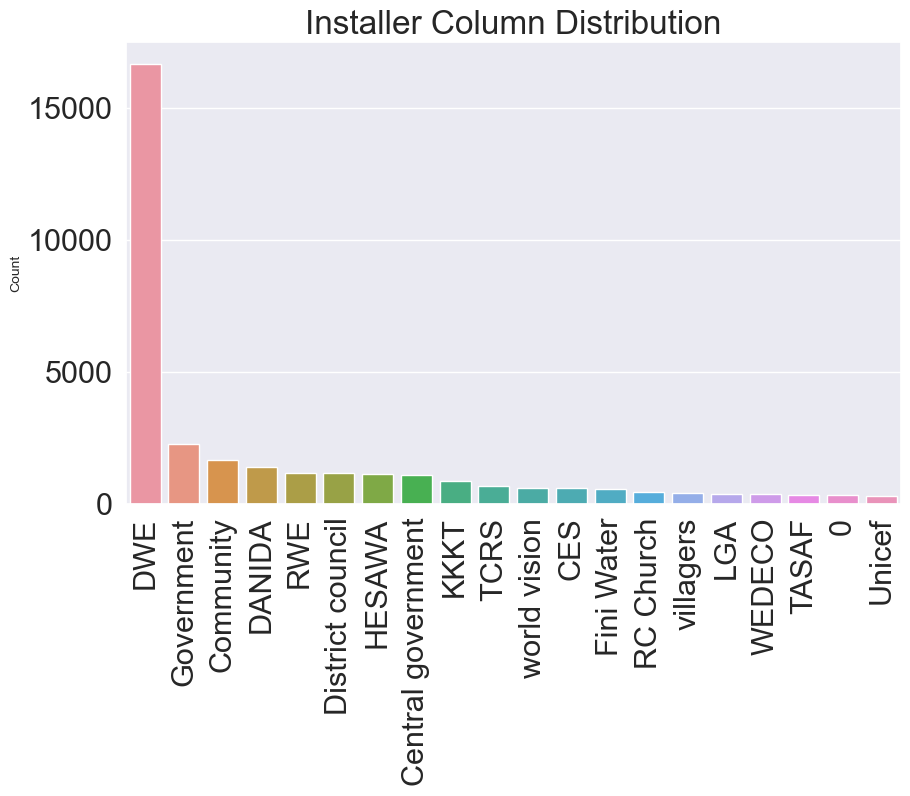

In [40]:
plot_data(df, 'installer', 'Installer Column Distribution')

Most of the water pump installations are done by an organization called DWE

### Water Point Type Distribution

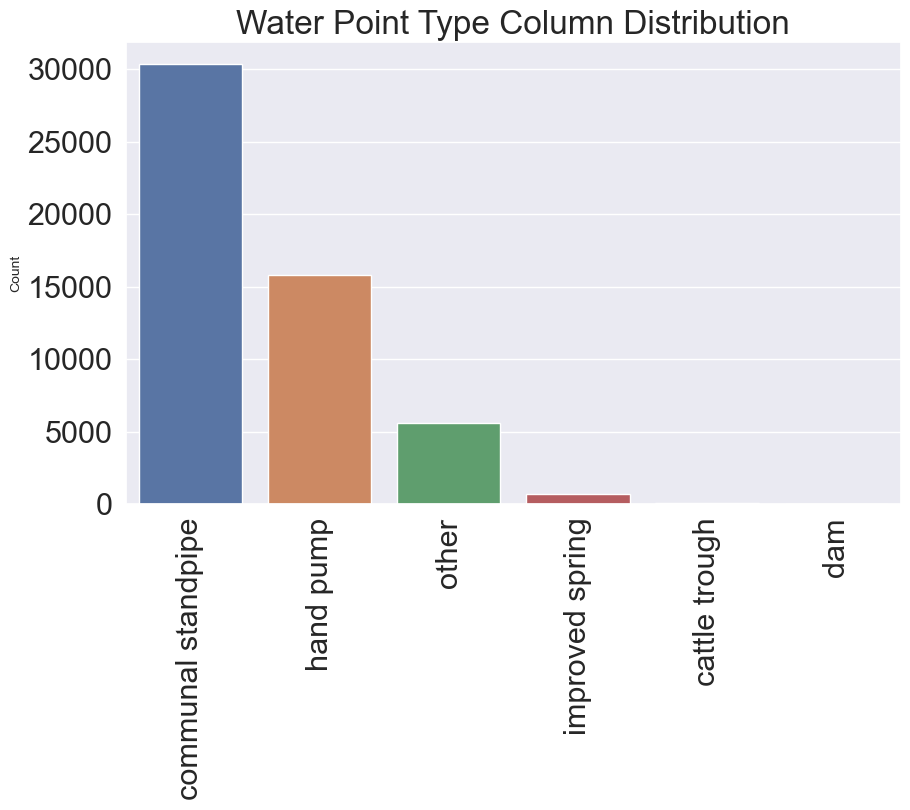

In [41]:
plot_data(df, 'waterpoint_type_group', 'Water Point Type Column Distribution')

The communities in Tanzania mostly use communal standpipe to pump their water

### Water Source Distribution

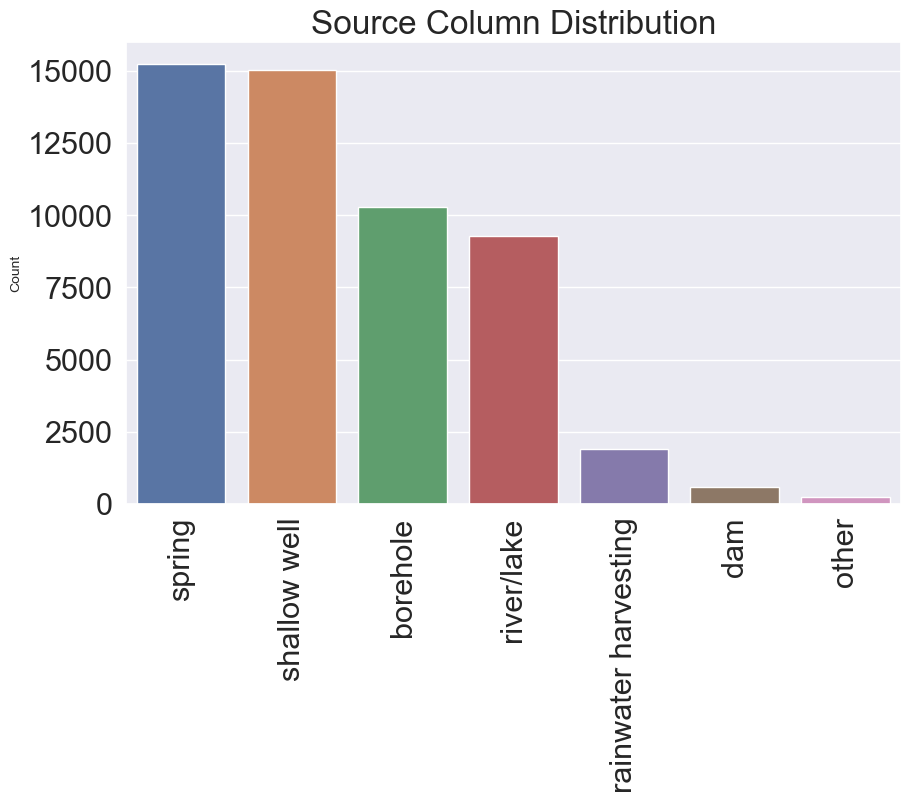

In [42]:
plot_data(df, 'source_type', 'Source Column Distribution')

Springs, shallow wells and boreholes are the main sources of water in the country 

### Management Distribution

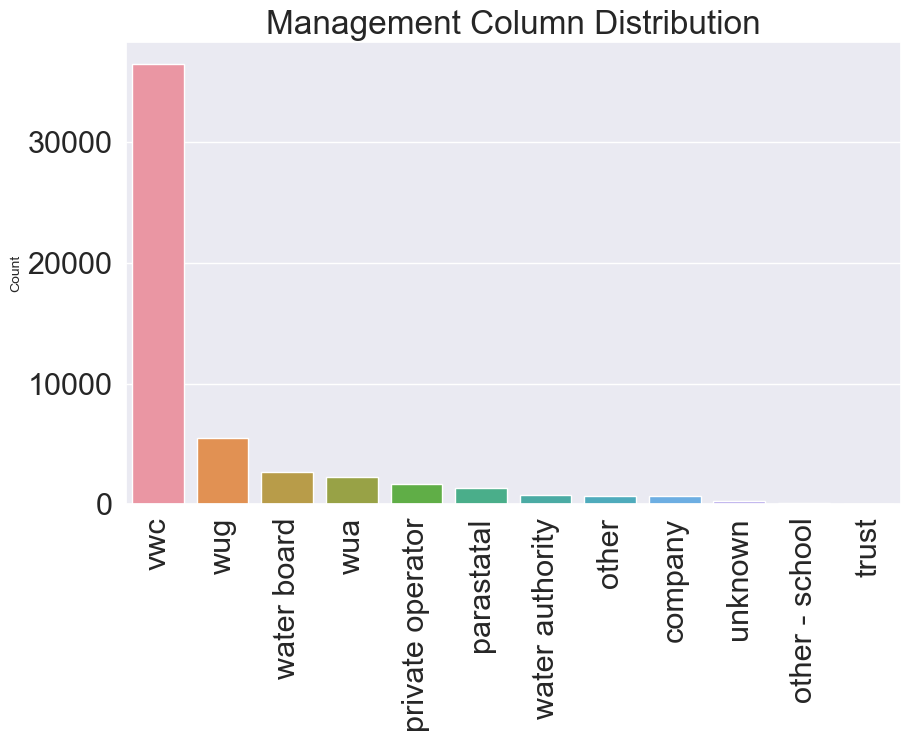

In [43]:
plot_data(df, 'management', 'Management Column Distribution')

Most of the wells are managed by vwc

### Extraction Type Distribution

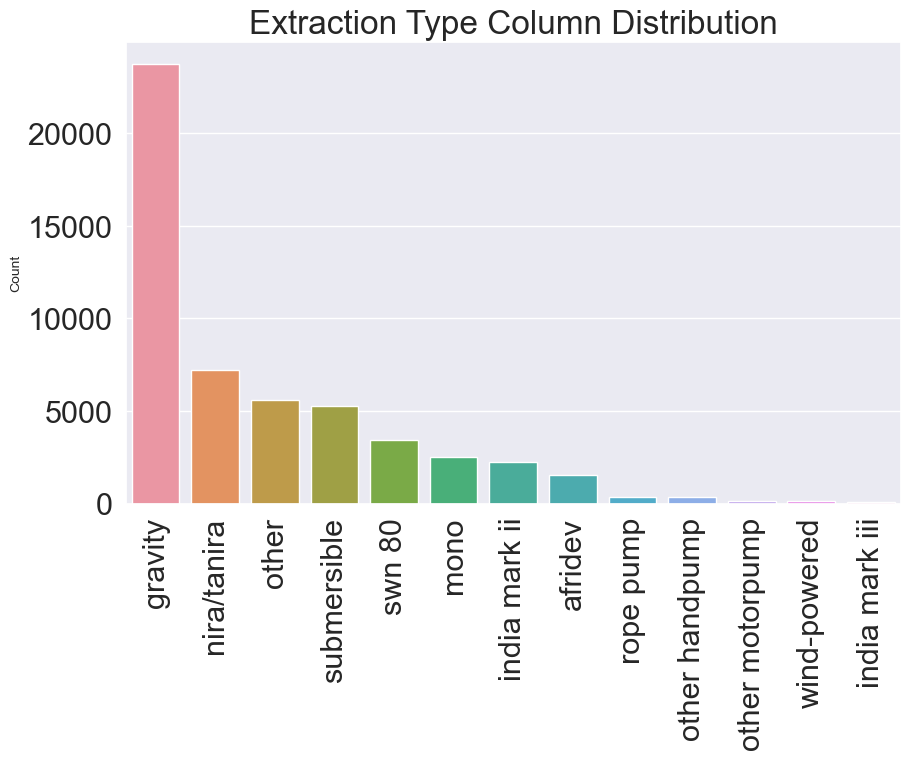

In [44]:
plot_data(df, 'extraction_type_group', 'Extraction Type Column Distribution')

The region mainly extracts its water using gravity 

### Payment Type Distribution

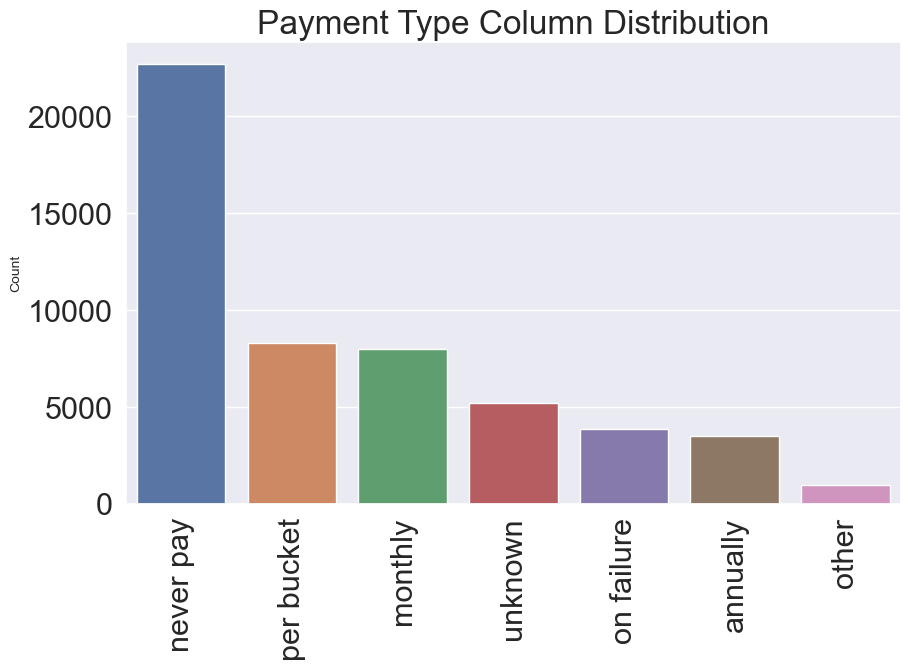

In [45]:
plot_data(df, 'payment_type', 'Payment Type Column Distribution')

Most people never pay for using the water wells to pump water. This might be because these wells are designed to benefit the community rather than generate profit from them .

### Water Quality Distribution

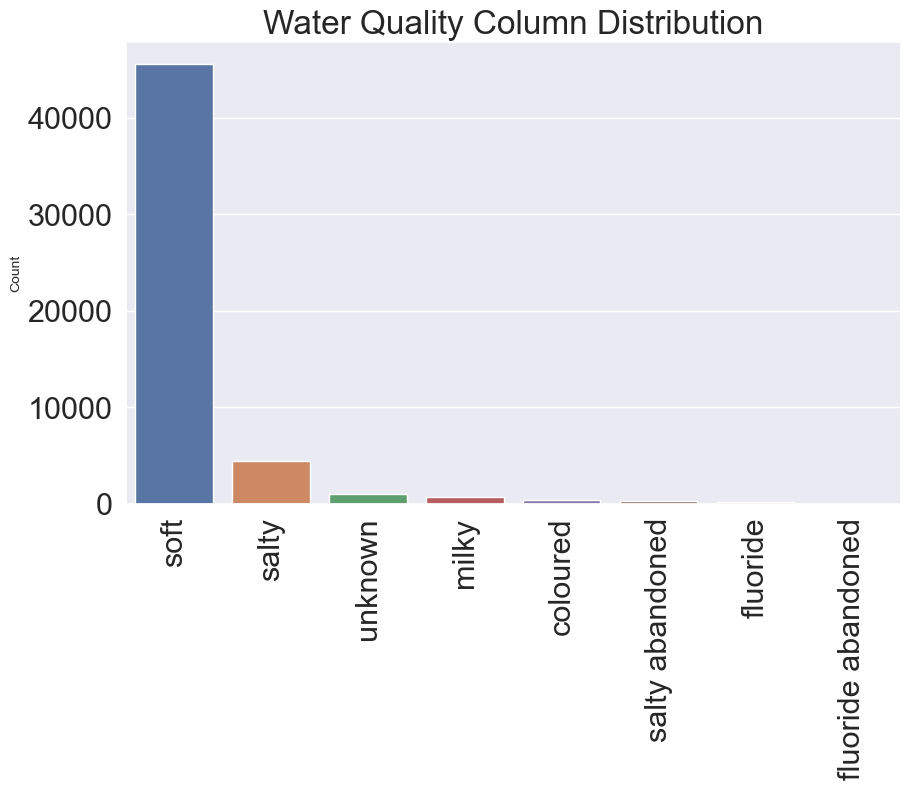

In [46]:
plot_data(df, 'water_quality', 'Water Quality Column Distribution')

Soft water is water free from calcium and magnesium salts , excessive amounts of these salts can damage your body and home. Examples of soft water include rainwater and distilled water etc. As per our visualization, communities in Tanzania mostly consume soft water 

### Quantity Distribution

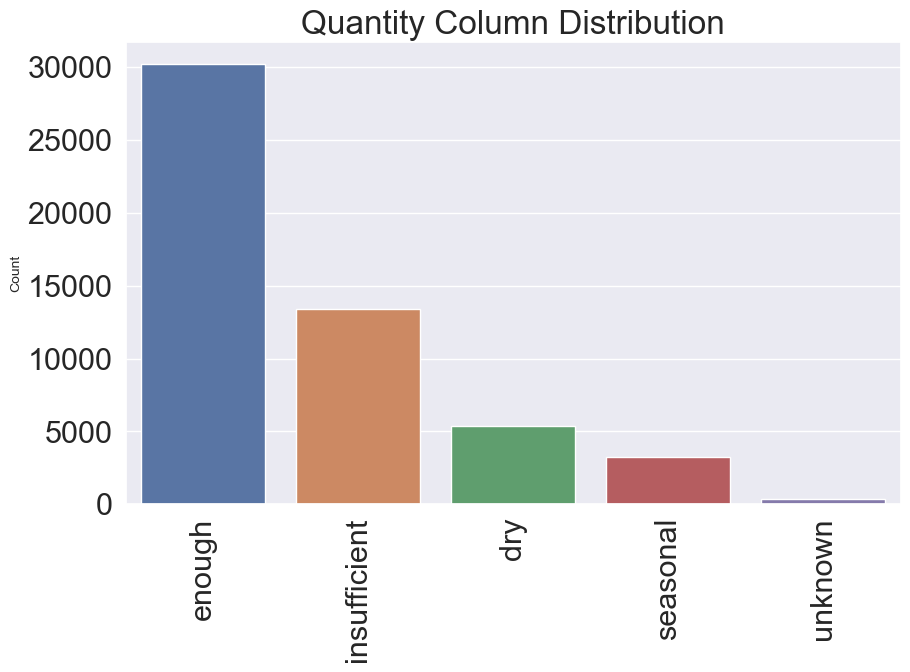

In [47]:
plot_data(df, 'quantity', 'Quantity Column Distribution')

Its clear that most communities in Tanzania have quite enough water to sustain them

### Pie Chart Showing Distribution of Status Group 

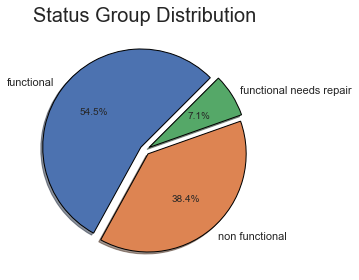

In [224]:
slices = df['status_group'].value_counts().values

labels = df['status_group'].value_counts().index 

explode = [0.05, 0.05, 0.05]

plt.pie(slices, labels=labels, wedgeprops={'edgecolor': 'black'}, explode=explode, shadow=True, autopct='%1.1f%%', startangle=45)

plt.title('Status Group Distribution', fontsize = 20)
plt.tight_layout()
plt.show()

From our pie chart we gather that approximately 55% of the water pumps are functional, 7% are functional but need repair and 38 % are non functional 

### Amount Total Static Head Distribution

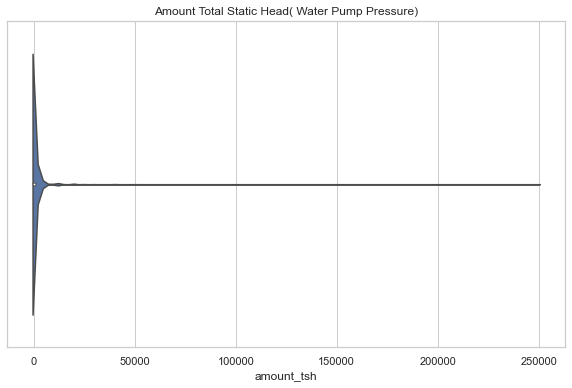

In [189]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x=df['amount_tsh'])
plt.title('Amount Total Static Head( Water Pump Pressure)')
plt.show()

The total static head as described previously refers to the water pump pressure, it indicates the height at which a water pump can raise water. This is a strong indication of a water point availability. Total Static Head of zero would mean the water pump cannot raise any water , this can alternatively mean that initially there was a water pump at the location however at the moment its not functional or it could mean that there is no well from which to pump water from.This brings up the assumption that maybe a total static head of 0 indicates a missing value since it would be quite pointless to have a water pump that cannot raise any water or it could indicate that we initially had a functioning water pump but got its no longer working therefore it cannot raise any water. We will use this column for modelling and assume there was an existing water pump however its no longer functional 

### Population Distribution

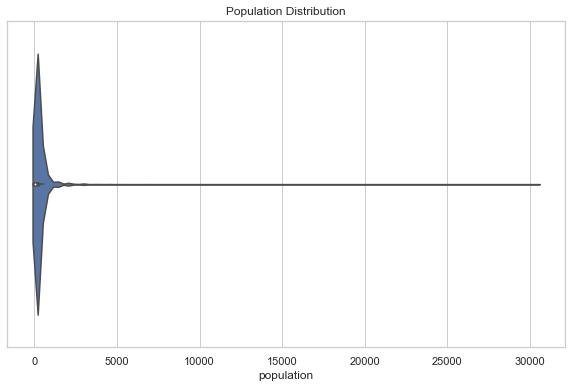

In [186]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x=df['population'])
plt.title('Population Distribution')
plt.show()

As per our visualization we mostly have zero population around the water wells . Initially we said that about 60% of the population has access to water. This proportion of people can get their water from other sources and not just water wells. Such can be used to explain why the distribution is converging towards 0

### Altitude of the Well(gps_height) Distribution

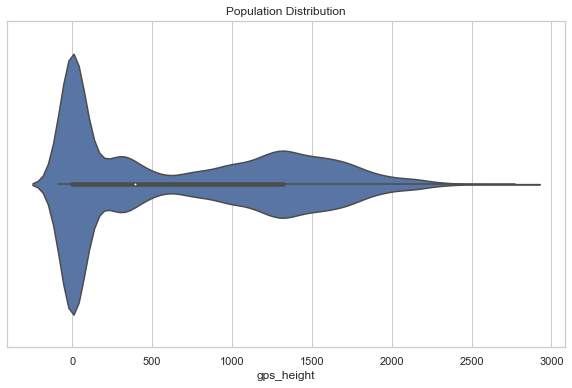

In [185]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x=df['gps_height'])
sns.set_theme(style="whitegrid")   
plt.title('Population Distribution')
plt.show()

The altitude of a well is dependent on the specific geopgraphic location. Tanzania has an average elevation of 1018 meters above sea level, this to mean that the well's altitude should be approximately the same or slighly lower. The altitude is an importamt factor, the higher the altitude, the lower the air pressure, and the lower the water pressure in the aquifer. This means that a well at a higher altitude may not be able to produce as much water as a well at a lower altitude. It's important to note that the actual altitude of a well can be influenced by many factors which specific to the location which might cause slight variations in the well's altitude compared to the land surface elevation.

Let's explore the relationship Different Features in our dataset 

### Basin Vs Status Group 

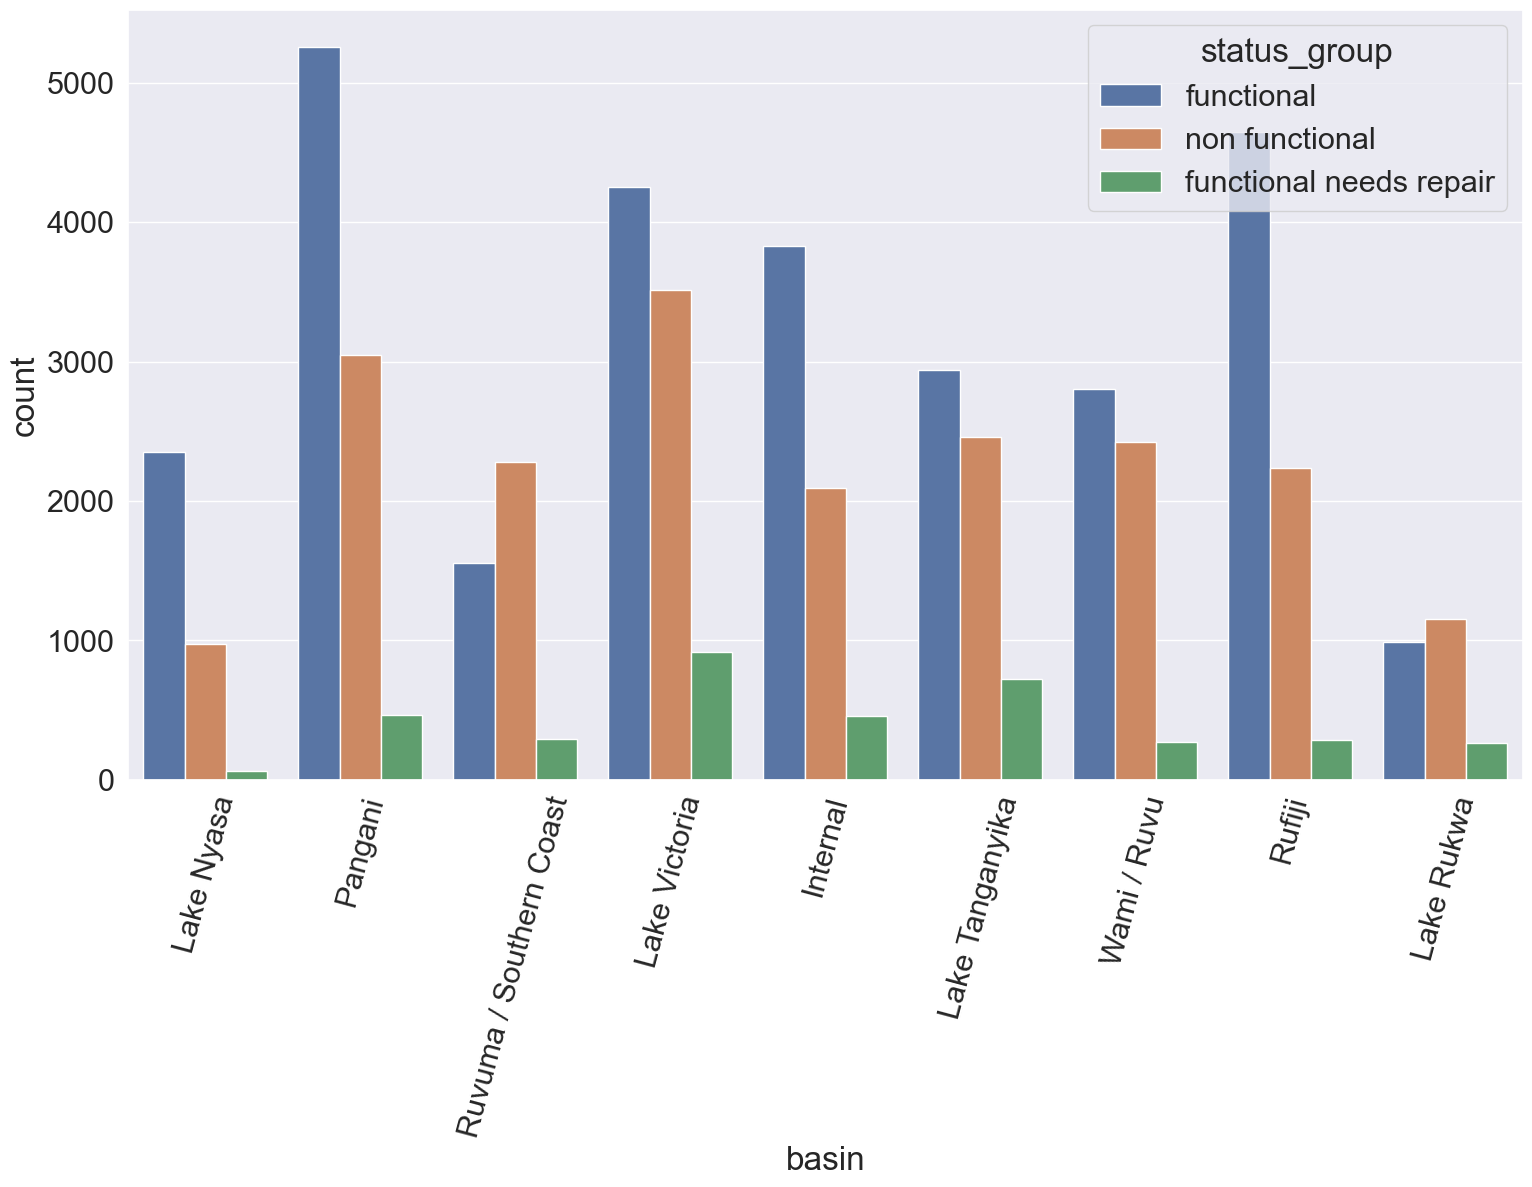

In [52]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x='basin', hue="status_group", data=df)
plt.xticks(rotation=75);


Pangani Basin has the most functional water wells while Lake Victoria contains mostly non - functioning water wells

### Region Vs Status Group

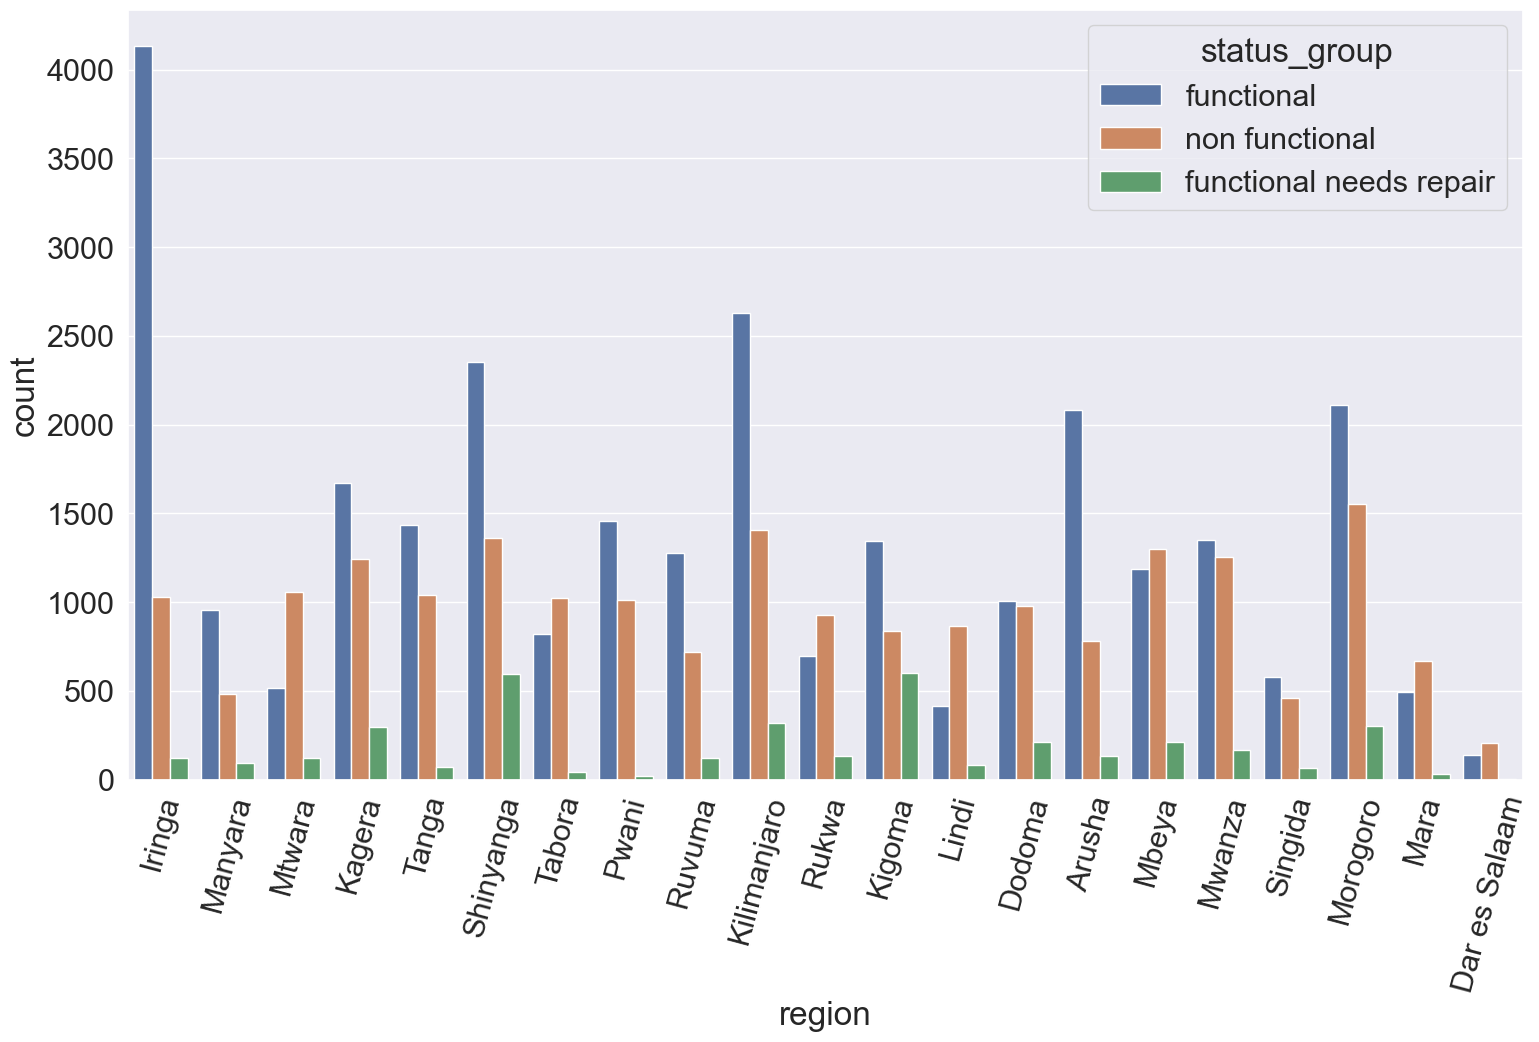

In [53]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x='region', hue="status_group", data=df)
plt.xticks(rotation=75);

The Iringa Region of Tanzania has a wide range of functional water wells , while Morogoro region has most non functinal water wells

### Public Meetings Vs Status Group 

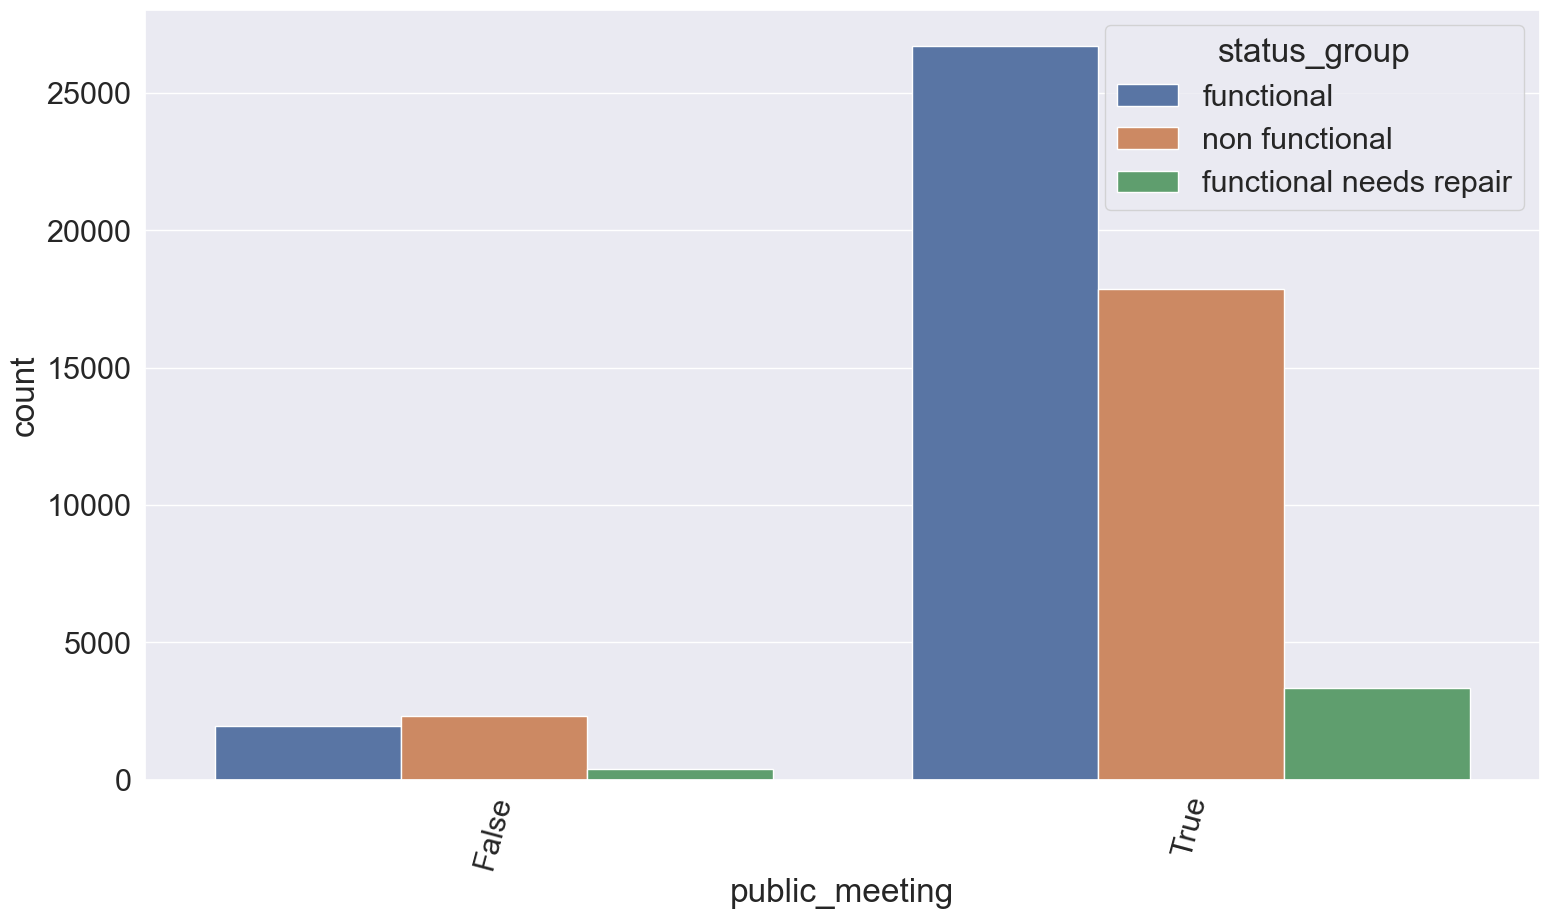

In [54]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x='public_meeting', hue="status_group", data=df)
plt.xticks(rotation=75);

Like we said before public meetings are forums where communities raise their issues, as per our visualization, communities that present their grievances seem to have more functional water wells

### Basin Vs Quantity 

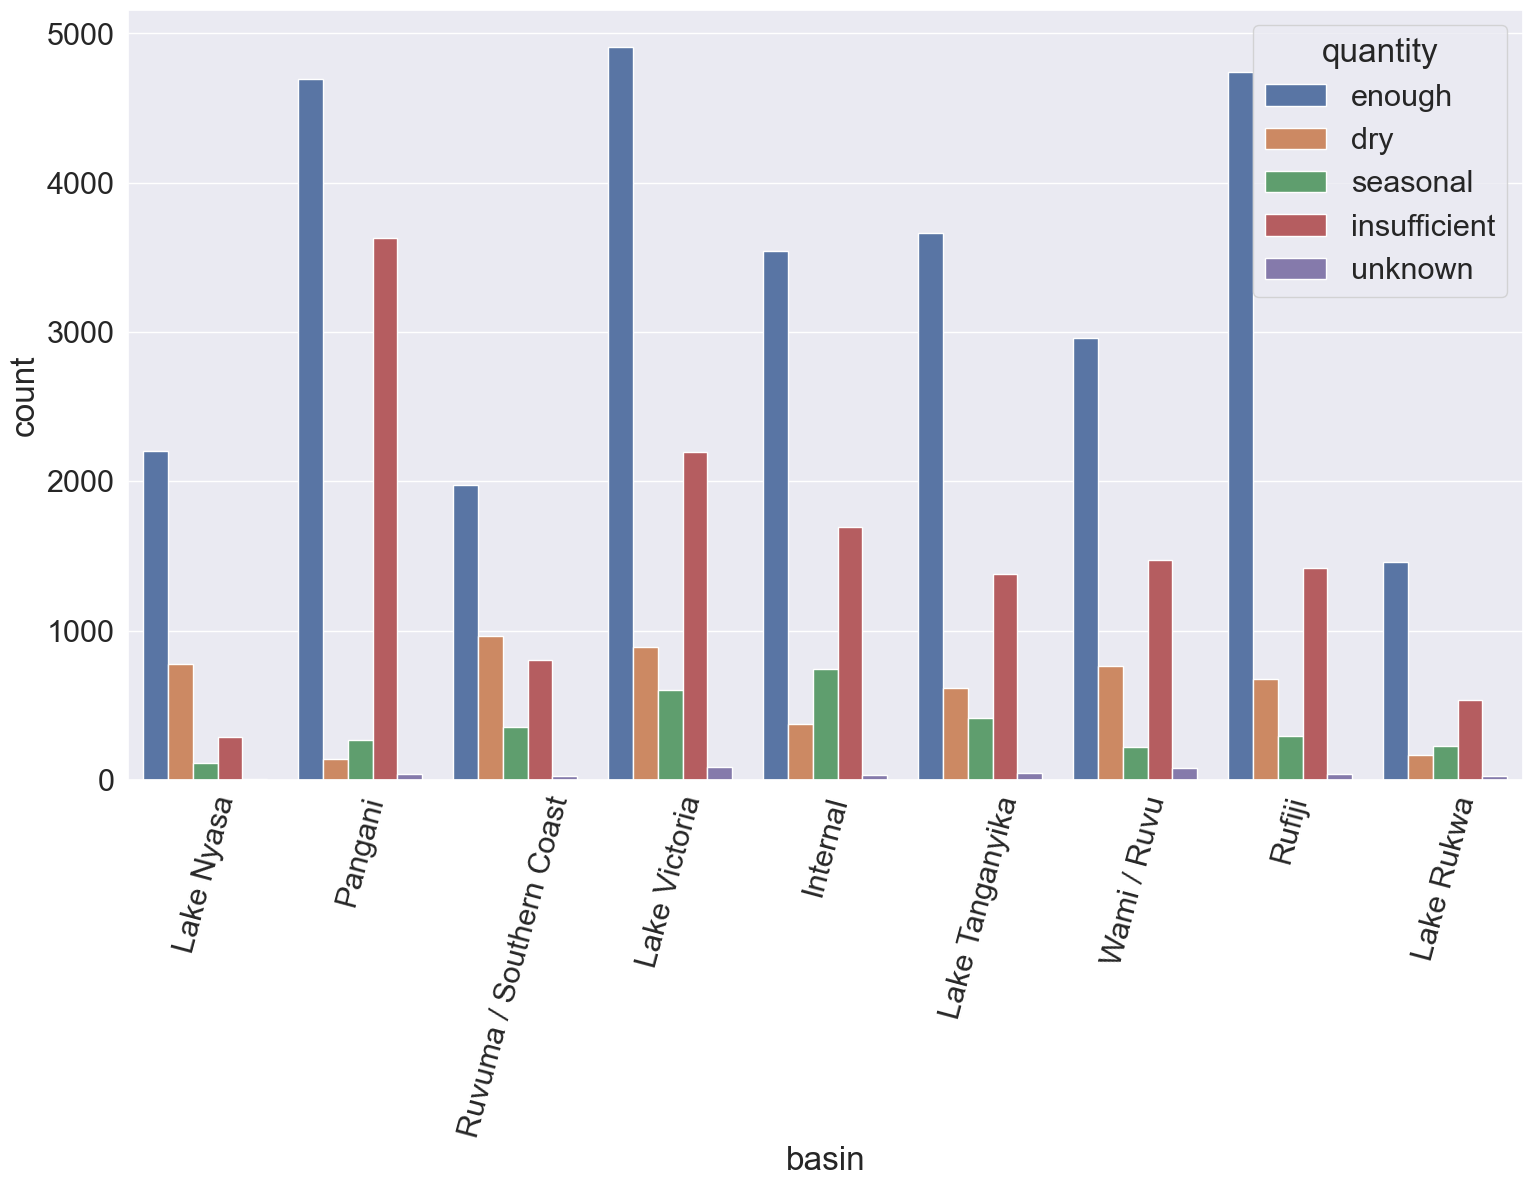

In [55]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x='basin', hue="quantity", data=df)
plt.xticks(rotation=75);

Lake Victoria has the most quantity of water

### Quantity Vs Functionality 

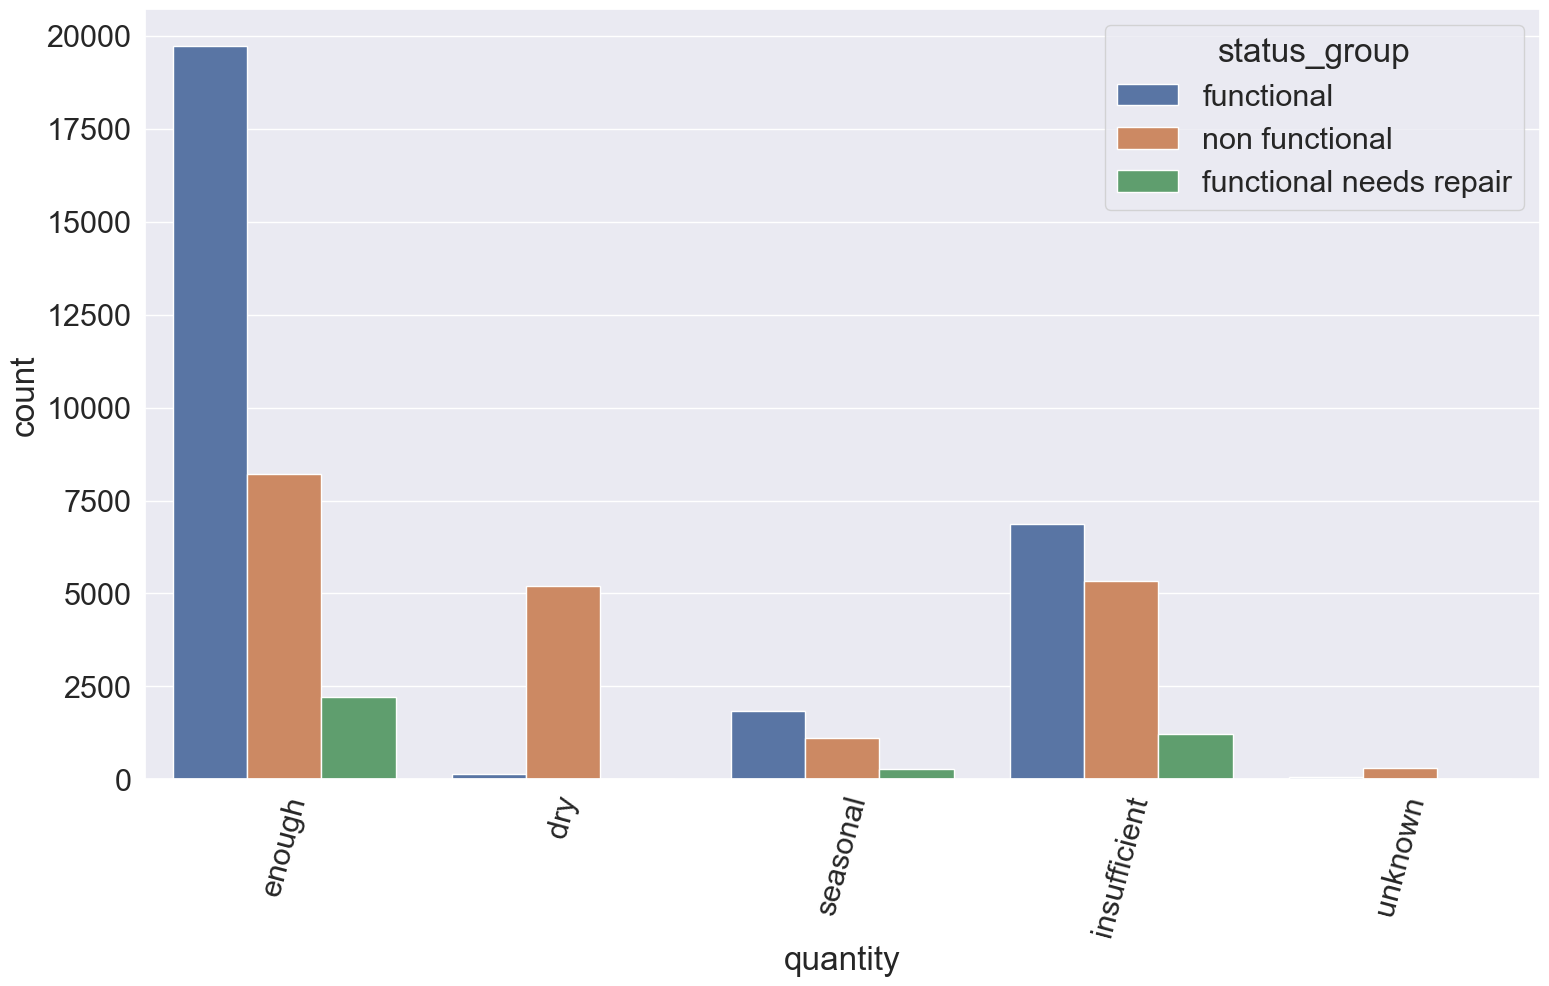

In [56]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x='quantity', hue="status_group", data=df)
plt.xticks(rotation=75);

The more water there is the more functional the wells are 

### Water Point Vs Status Group 

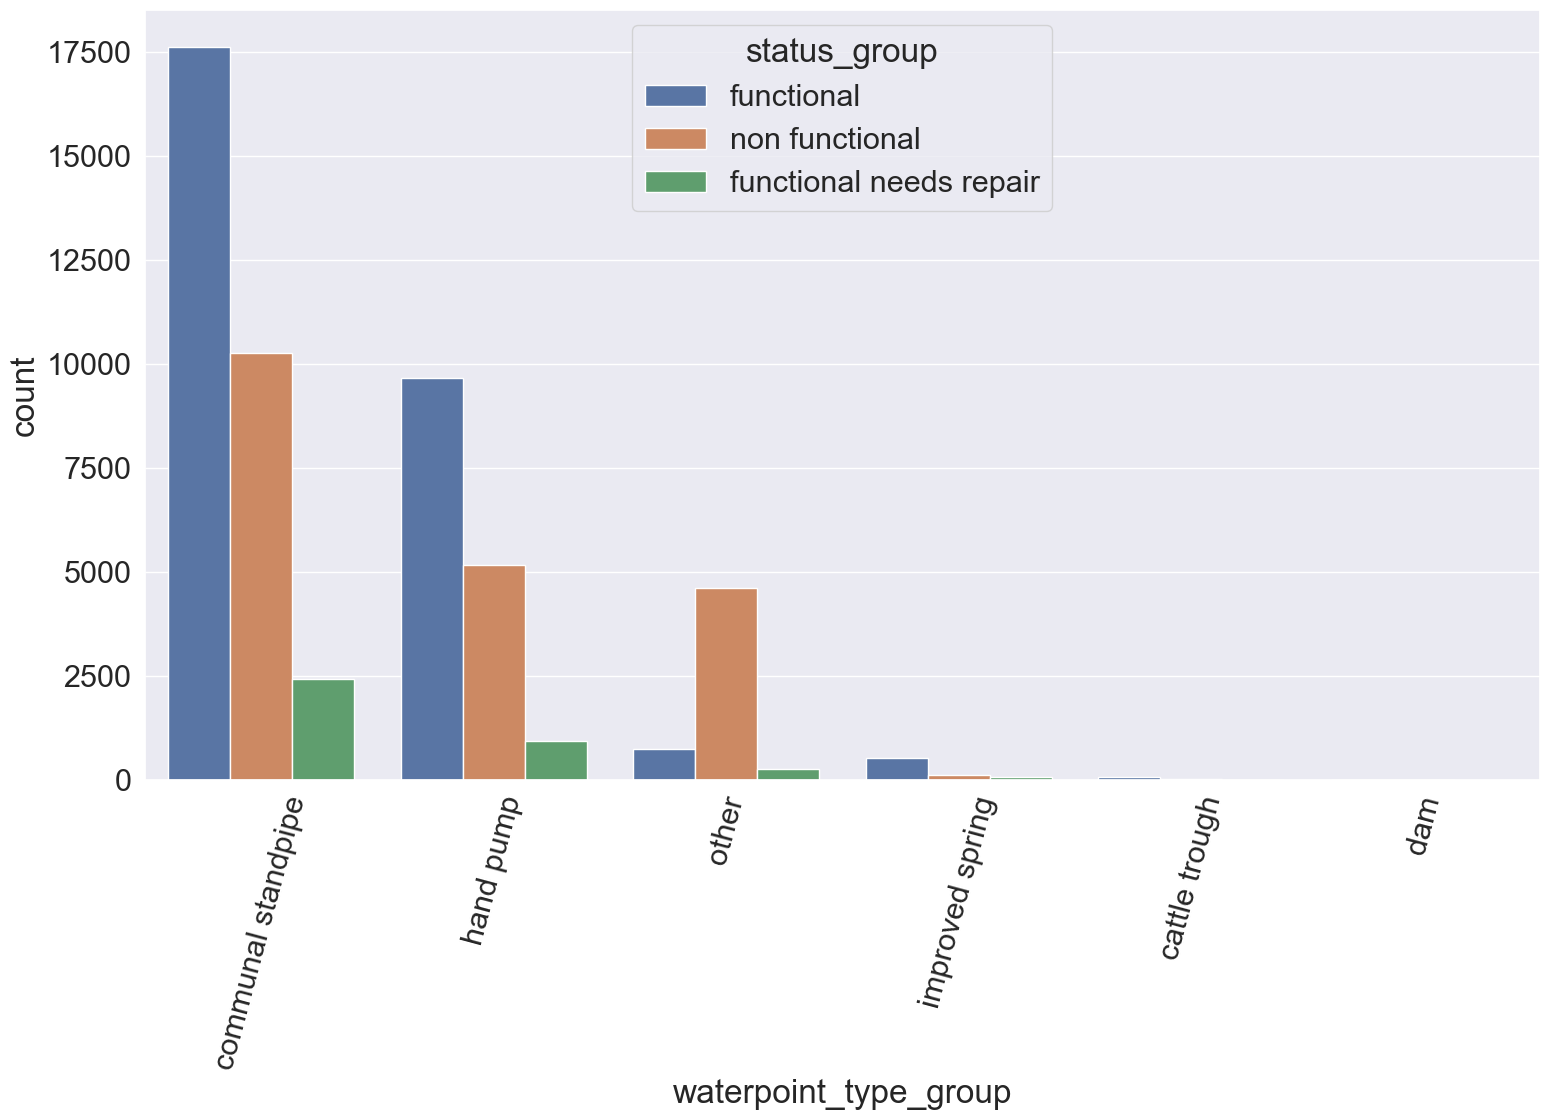

In [57]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x='waterpoint_type_group', hue="status_group", data=df)
plt.xticks(rotation=75);

Communal standpipes seem to be having most functional water wells as opposed to cattle trough and dams

### Payment Vs Fuctionality

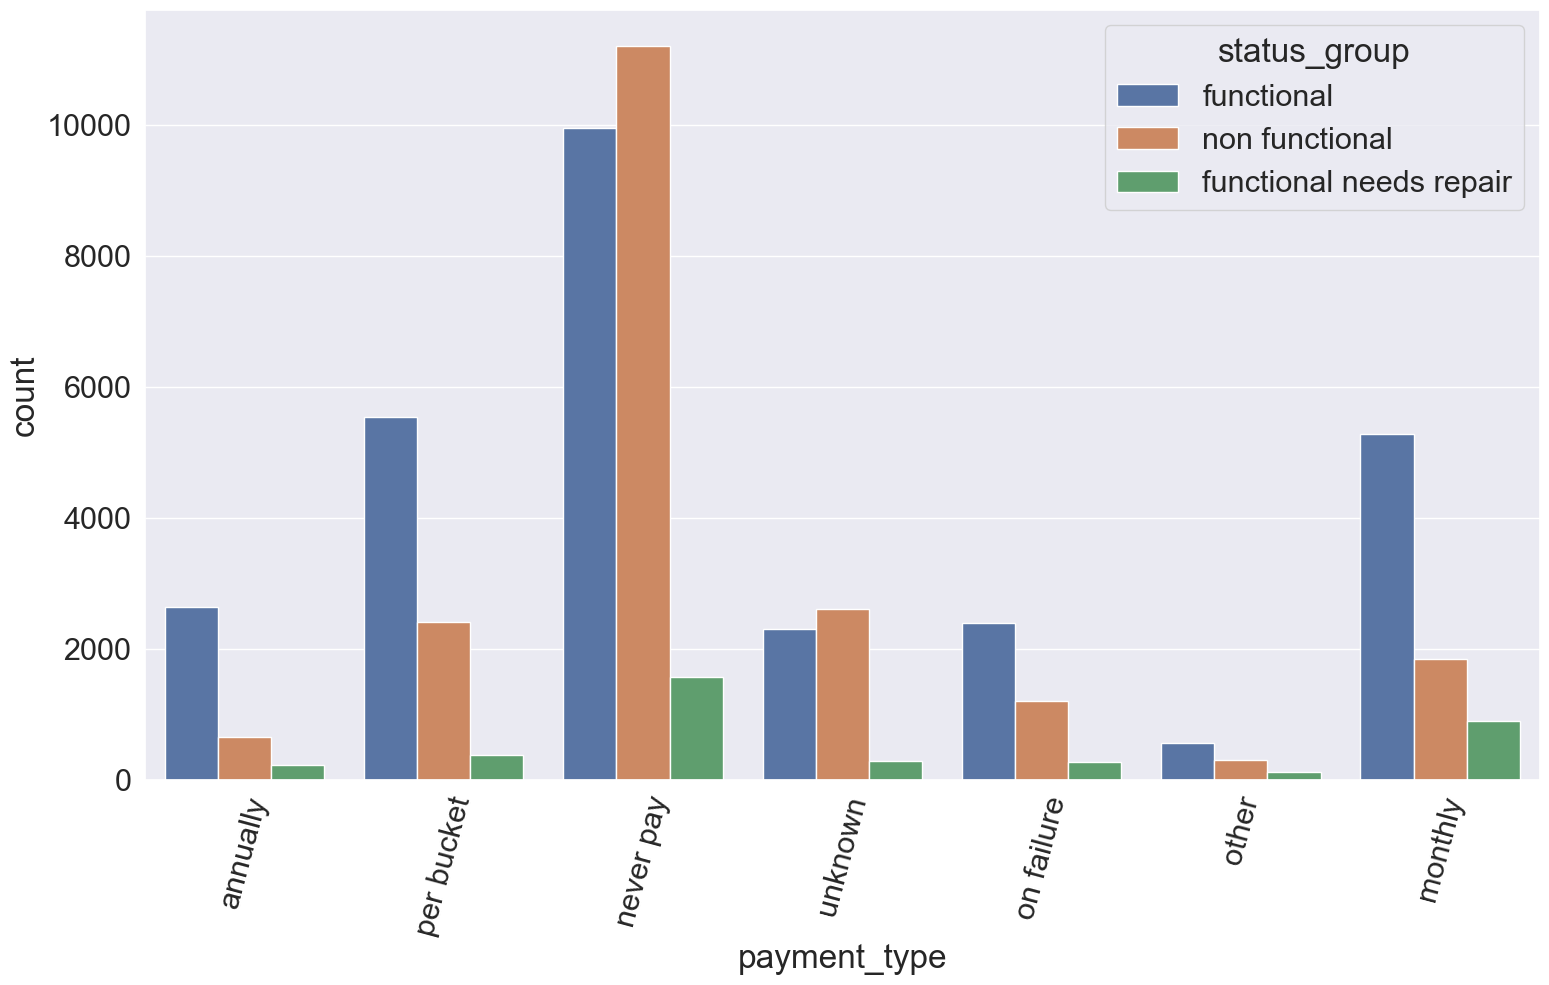

In [58]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x='payment_type', hue="status_group", data=df)
plt.xticks(rotation=75);

Most of the functional and non functional water pumps are never paid for, again this might be because of the fact that they are communal 

### Management Vs Status Group 

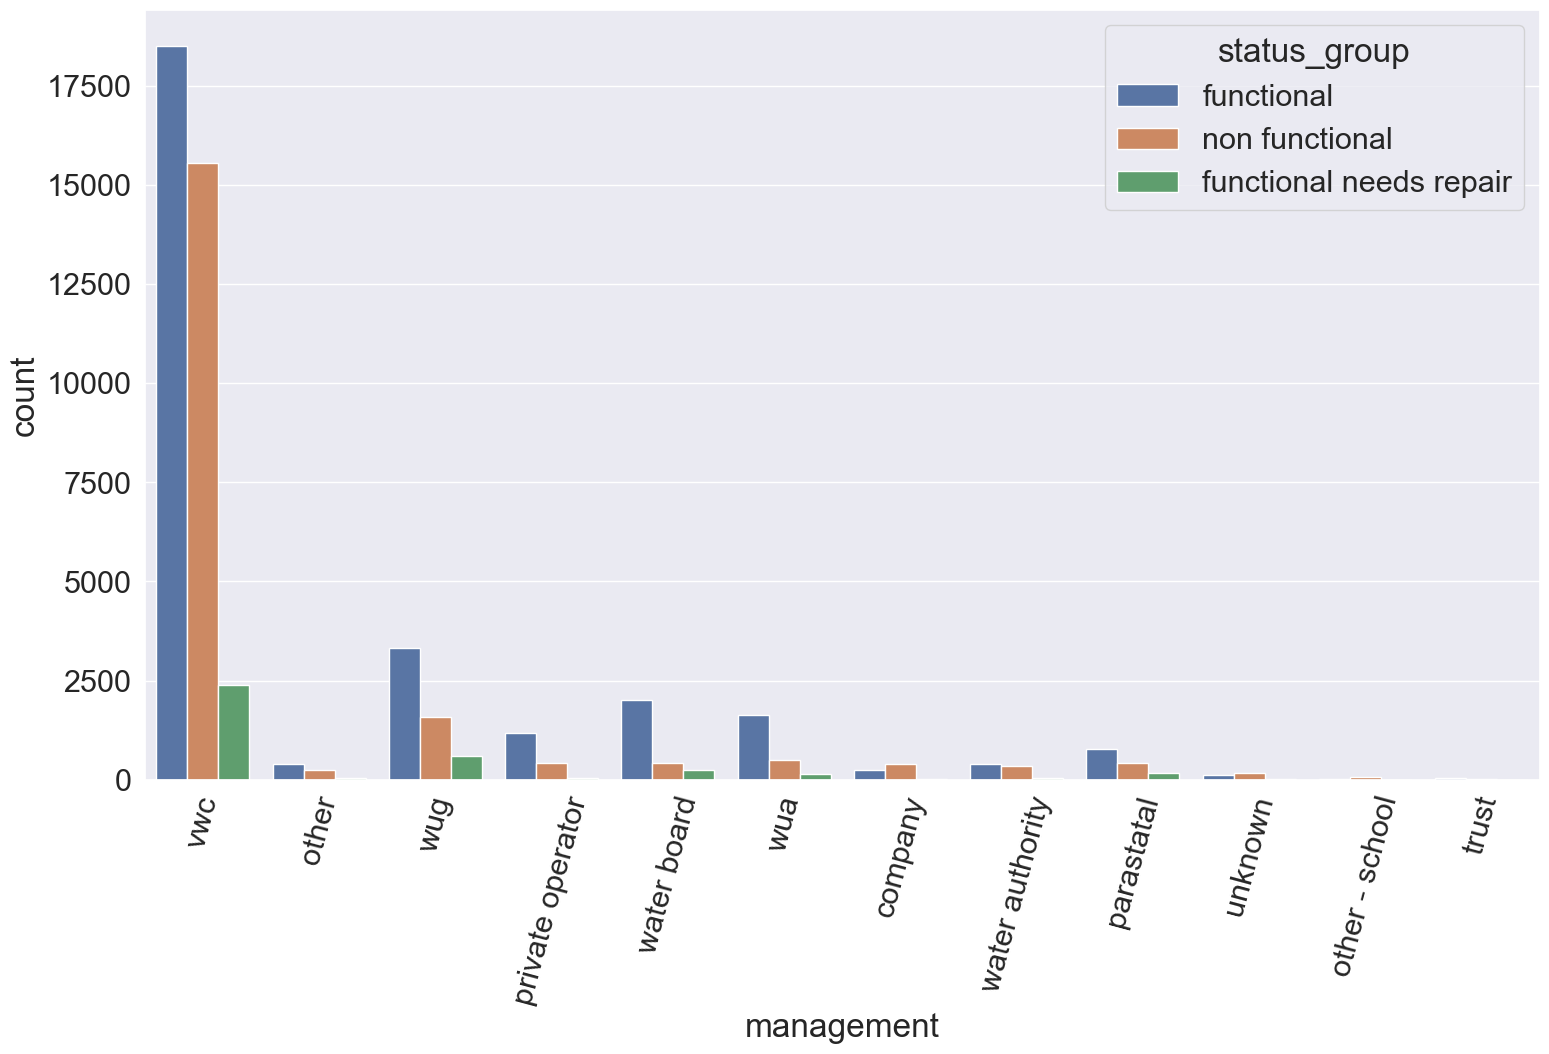

In [59]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x='management', hue="status_group", data=df)
plt.xticks(rotation=75);

## Modelling 

>>> Our main objective is to be able to make predictions on whether we have water pumps that are functional, non-functional or functional but needs repair based on the features we have on our dataset This task is to be achieved by evalauting different algorithmns and checking to see whether they meet our evaluation metrics.
We will be evaluation the following algorithmns :
* K-Nearest Neighbors
* Decision Trees
* Random Forest
* Gradient Boosting

Let's go ahead and pre-process our data to have it ready for modelling

Numeric Representation of the status group colummn

In [60]:
# let's preview the column first 

tally(df.status_group)

functional                 28643
non functional             20188
functional needs repair     3729
Name: status_group, dtype: int64

In [61]:
# creating a copy of our dataframe

df1 = df.copy()

new_status_group = {'non functional':0, 'functional': 1, 'functional needs repair': 2, } # converting string to numerical values 

df1['status_group'] = df1['status_group'].replace(new_status_group)

One Hote Encoding

In [62]:
categorical = ['basin', 'public_meeting', 'management', 'water_quality', 'quantity', 'source_type']
ohe = pd.get_dummies(df[categorical], prefix = categorical, drop_first=True )

In [63]:
new_df = pd.concat([ohe, df1['amount_tsh']], axis = 1)


In [64]:
# Defining x and y
X = new_df
y = df1['status_group']

# Performing train test and split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### K-Nearest Neighbors

KNN is an effective classification and regression algorithm that uses nearby points in order to generate a prediction.

In [190]:
# create a pipeline

pipe_1 = Pipeline([('ss', StandardScaler()),
                ('neighbors', KNeighborsClassifier())])

# fit the training data

pipe_1.fit(X_train, y_train)

#predict on test data

y_pred_1 = pipe_1.predict(X_test)



Evaluate The Model

In [191]:
# evaluation metrics function

def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average='weighted')))
    print("Recall Score: {}".format(recall_score(labels, preds, average='weighted')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average='weighted')))
    
print_metrics(y_test, y_pred_1)


Precision Score: 0.6568974009801735
Recall Score: 0.6719939117199392
Accuracy Score: 0.6719939117199392
F1 Score: 0.6553783165145575


In [225]:
RMSE = round(mean_squared_error(y_test, y_pred_1, squared = False ), 2)

print(f"Our model has a {RMSE} chance of making an error")

Our model has a 0.62 chance of making an error


### Decision Tree Classifier 

Decision trees are a supervised machine learning algorithm used to classify or estimate continuous values by partitioning the sample space asefficiently as possible into sets with similar data points until you get to a homogenous set and can reasonably predict the value for new data points

In [192]:
# create a pipeline

pipe_2 = Pipeline([('mms', MinMaxScaler()),
                ('tree', DecisionTreeClassifier(random_state=42))])

# fit the training data

pipe_2.fit(X_train, y_train)

#predict on test data

y_pred_2 = pipe_2.predict(X_test)


Evaluate the model 

In [193]:


print_metrics(y_test, y_pred_2)


Precision Score: 0.69955039163471
Recall Score: 0.709855403348554
Accuracy Score: 0.709855403348554
F1 Score: 0.6912111267183861


In [226]:
RMSE = round(mean_squared_error(y_test, y_pred_2, squared = False ), 2)

print(f"Our model has a {RMSE} chance of making an error")

Our model has a 0.58 chance of making an error


### Random Forest

Random Forest is built on decision trees. They operate by growing many classification trees Each tree gives a classification, and we say the tree "votes" for that class. The forest chooses the classification having the most votes (over all the trees in the forest), thus creating high variance among all trees in our forest.

In [194]:
# create pipeline

pipe_3 = Pipeline([('forest', RandomForestClassifier())])

# create a grid parameter

grid = {'forest__criterion' : ['gini', 'entropy'],
        'forest__max_depth': [6,7],
        'forest__max_features': [1.0],
        'forest__n_estimators':[100, 200]}

# creating grid with pipe as the estimator

gridsearch = GridSearchCV(estimator=pipe_3,
                        param_grid=grid,
                        scoring='accuracy',
                        cv=5)

# fit training data using grid search

gridsearch.fit(X_train, y_train)

# predict using grid search on test data

y_pred_3 = gridsearch.predict(X_test)


In [ ]:
Evaluate the model 

In [196]:
print_metrics(y_test, y_pred_3)

Precision Score: 0.6817066654501316
Recall Score: 0.6809360730593608
Accuracy Score: 0.6809360730593608
F1 Score: 0.6516854035280798


In [227]:
RMSE = round(mean_squared_error(y_test, y_pred_3, squared = False ), 2)

print(f"Our model has a {RMSE} chance of making an error")

Our model has a 0.6 chance of making an error


## Feature Importance

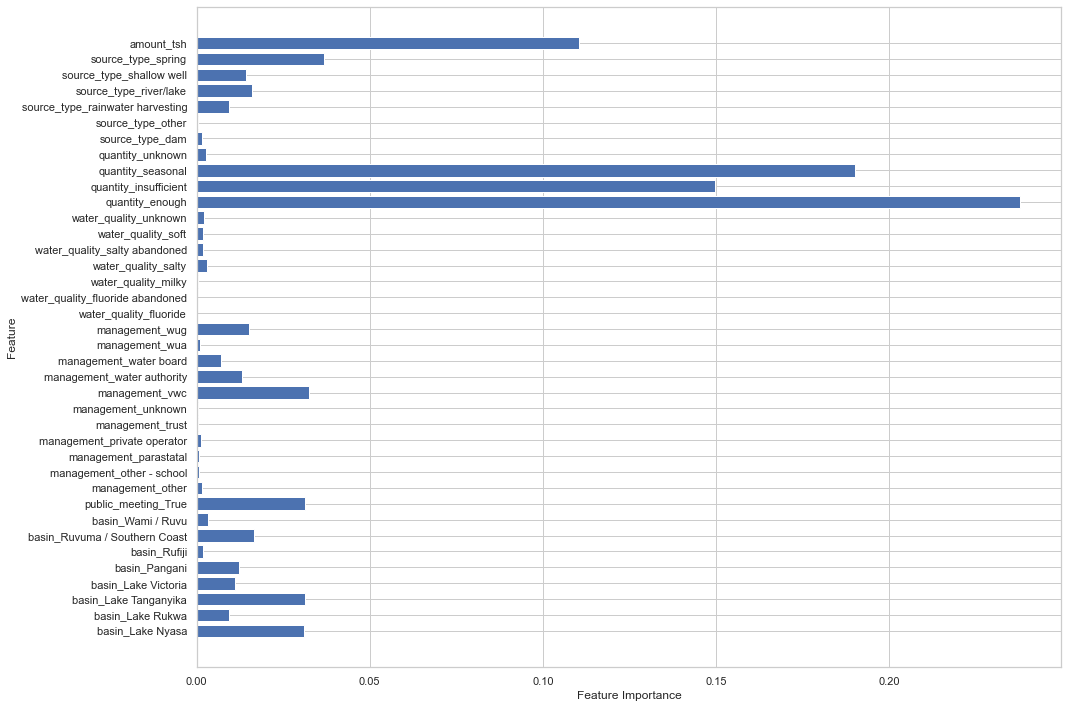

In [218]:
def plot_feature_importances(model, X_train):
    if isinstance(model, Pipeline):
        last_step = model.steps[-1][1]  # Get the last step in the pipeline
        if hasattr(last_step, 'feature_importances_'):
            n_features = X_train.shape[1]
            plt.figure(figsize=(15, 10))
            plt.barh(range(n_features), last_step.feature_importances_, align='center')
            plt.yticks(np.arange(n_features), X_train.columns.values)
            plt.xlabel('Feature Importance')
            plt.ylabel('Feature')
            plt.tight_layout()
            return
    print("Error: The model does not have feature importances.")

plot_feature_importances(gridsearch.best_estimator_, X_train)


### Gradient Boosting

Boosting Algorithms are also known as weak learners , they work by training a single weak learner, figure out which examples the weak learner got wrong, build another weak learner that focuses on the areas the first weak learner got wrong, continue this process untill a predetermined stopping condition is met, such as until a set number of weak learners have been created, or the the models performance plateaued. In this way, each new weak learner is specifically tuned to focus on the weak points of the previous weak learner(s). 

In [171]:
# create a pipeline

pipe = Pipeline([('gbc', GradientBoostingClassifier())])

# create a grid parameter

param_grid = {'gbc__learning_rate': [0.075,0.07],
                'gbc__max_depth': [6,7],
                'gbc__min_samples_leaf': [7,8],
                'gbc__max_features': [1.0],
                'gbc__n_estimators':[100, 200]}
                
gbc = GridSearchCV(estimator=pipe,
                    param_grid=param_grid,
                    n_jobs=-1)


# fit training data using grid search

gbc.fit(X_train, y_train)

# predict testing data using grid search

y_pred_u = gbc.predict(X_test)

In [ ]:
Model Evaluation

In [197]:
print_metrics(y_test, y_pred_u)

Precision Score: 0.7065911022829916
Recall Score: 0.7120433789954338
Accuracy Score: 0.7120433789954338
F1 Score: 0.6918314075413823


In [228]:
RMSE = round(mean_squared_error(y_test, y_pred_u, squared = False ), 2)

print(f"Our model has a {RMSE} chance of making an error")

Our model has a 0.58 chance of making an error


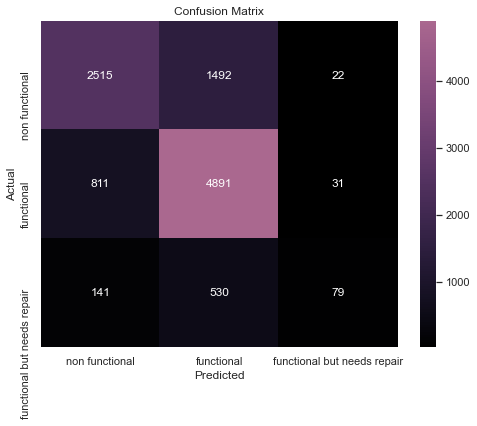

In [208]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_u)
classes = ['non functional', 'functional', 'functional but needs repair']  

# Ploting confusion matrix

plt.figure(figsize=(8, 6))
cmap = sns.cubehelix_palette(50, hue=0.8, rot=0.4, light=0, dark=0.5, as_cmap=True)
sns.heatmap(cnf_matrix, cmap=cmap, xticklabels=classes, yticklabels=classes, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Evaluation

The True Positive Rate is what matters most for this project , we want to reduce the number of False Negatives. Mortality rates due to inadequate supply of water should be something we are moving eradicate therefore sensitivity of the model was our top priority. We had set a recall and accuracy score of 70% + for our model, this was achievable through Gradient Boosting thus the optimal model for water pump functionality.


## Reccomendations 

The following are reccomdended :

1. The UN-Habitat should partner with the government to ensure efficient pulling of funds such as to raise enough capital to push the initiative.

2. When the UN Habitat kicks the initiative they should look to contract DWE to do the water pump installations.

3. Features such as amount_tsh (water pump pressure ) and quantity of water are key indicators of water pump functionality, The organization should use these features to decide on whether a water pump is functional.

4. Lake Victoria has the most non functional wells yet its one of the largest water bodies in the region. The UN Habitat should perform an excursion on the region and check to see the resason why so and formulate a plan to solve that.

Its worth noting that most of the population does not stay around the wells, close to 2/3 of the population has access to water supply furthermore the country's urbanization rate has been increasing at a rate of 0.7 % per year , this brings up the assumption that maybe most people have adopted piped water as opposed to fetching water from wells . If the UN Habitat would also look into access to water supply in urban areas for their initiave in addition to fixing the water pumps then they would be making tremendous contribution towards their 2030 Agenda to  achieve their Sustainable Development Goals 

## Conclusion

The model did well with continous training but with more and updated data I believe it can make better predictions and improve the performance of our model. This will also solve the imbalance we seem to have had on our dataset.